# ```ASSIGNMENT 1B - REGRESSION WITH REGULARIZATION```

## ```TEAM MEMBERS```
    1. Pavas Garg - 2021A7PS2587H
    2. Tushar Raghani - 2021A7PS1404H
    3. Rohan Pothireddy - 2021A7PS0365H

# ```Importing the Libraries```


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

## `⏳ Loading the Dataset`


In [2]:
dataset = pd.read_csv("Fish Data - A2.csv")

In [3]:
dataset.head()

Height   Width  Weight
0  11.5200  4.0200   242.0
1  12.4800  4.3056   290.0
2  12.3778  4.6961   340.0
3  12.7300  4.4555   363.0
4  12.4440  5.1340   430.0

In [4]:
print("Number of records in the given dataset are: ",len(dataset))
print("Number of features in the given dataset are: ",len(dataset.columns)-1)

Number of records in the given dataset are:  159
Number of features in the given dataset are:  2


# ```TASK 1: DATA PREPROCESSING```

# ```🔬Preprocess and perform exploratory data analysis of the dataset obtained```

# `📊 Plotting Histograms`

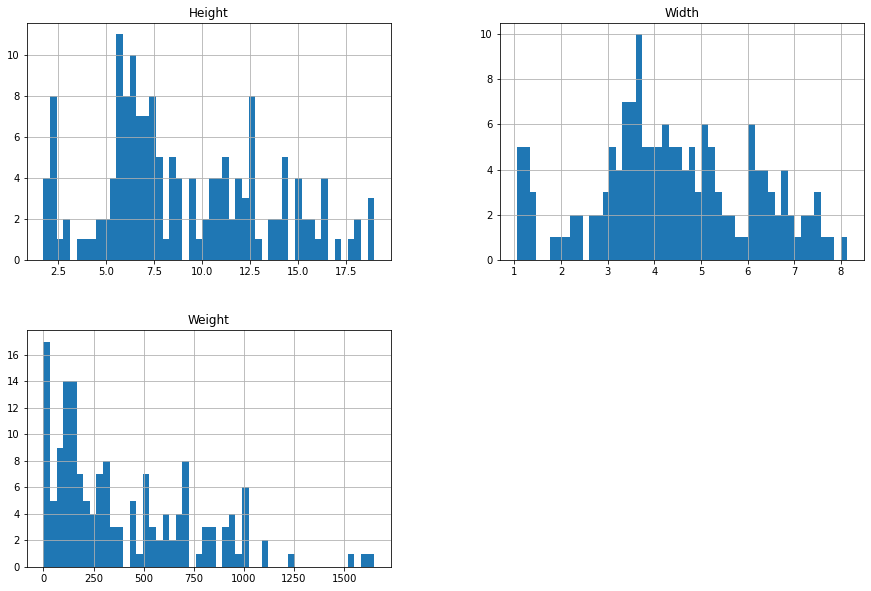

In [5]:
dataset.hist(bins = 50,figsize=(15,10))
plt.show()

# `Feature Scaling`

### Normalization Method
- Normalization is performed to transform the data to have a mean of 0 and standard deviation of 1
- Normalization is also known as Z-Score Normalization

\begin{equation}
z = \frac{(x-\mu)}{\sigma}
\end{equation}

In [6]:
# to check if null values or NAN are present in the dataset
nan_count = dataset.isna().sum().sum()
null_count = dataset.isnull().sum().sum()
print("NAN count: ",nan_count)
print("NULL count: ",null_count)

NAN count:  0
NULL count:  0


In [7]:
# function for finding mean of a feature in a given dataset
def find_mean(dataset,feature):
    n = len(dataset[feature])
    sum = 0
    count_nan_null_values = 0
    for val in dataset[feature]:
        if not isinstance(val, (int, float)):
            count_nan_null_values += 1
        else:
            sum += val
    return sum/n-count_nan_null_values

In [8]:
find_mean(dataset,"Width")

4.417485534591194

In [9]:
find_mean(dataset,"Height")

8.970993710691822

In [10]:
# function to replace NULL values with mean
def replace_with_mean(dataset,feature,mean):
   dataset[feature].fillna(mean,inplace=True)

In [11]:
nan_count = dataset.isna().sum().sum()
null_count = dataset.isnull().sum().sum()
print("NAN count: ",nan_count)
print("NULL count: ",null_count)

NAN count:  0
NULL count:  0


In [12]:
# replacing values which are 0 with the mean
mean = find_mean(dataset,"Weight")
dataset['Weight'] = dataset['Weight'].replace(0,mean)

In [13]:
for feature in dataset.columns:
    mean = find_mean(dataset,feature)
    replace_with_mean(dataset,feature,mean)

In [14]:
# function for finding standard deviation of a feature in a given dataset
def find_standard_deviation(dataset,feature):
    variance, squared_sum = 0,0
    n = len(dataset[feature])
    mean = find_mean(dataset,feature)
    for val in dataset[feature]:
        squared_sum += (val-mean)**2
    variance = squared_sum/n
    return math.sqrt(variance)

In [15]:
# function for scaling a feature in given dataset
def normalize_feature(dataset,feature):
    mean = find_mean(dataset,feature)
    standard_deviation = find_standard_deviation(dataset,feature)
    normalized_feature = []
    for val in dataset[feature]:
        normalized_feature.append((val-mean)/standard_deviation)
    return normalized_feature

In [16]:
# function for scaling (normalizing) the whole dataset
def normalize_dataset(dataset):
    df = dataset.drop(columns = "Weight")
    normalized_df = pd.DataFrame()
    for feature in df.columns:
        normalized_result = normalize_feature(df,feature)
        normalized_df[feature] = normalized_result
        
# When copying columns from one DataFrame to another, you might get NaN values in the resulting DataFrame.
# The issue is caused because the indexes of the DataFrames are different.
# This causes the indexes for each column to be different.
# When pandas tries to align the indexes when assigning columns to the second DataFrame, it fails and inserts NaN values.
# One way to resolve the issue is to homogenize the index values.
# for eg [a,b,c,d] for df1 and indices for df2 are [1,2,3,4]
# that's why use df1.index = df2.index

    normalized_df.index = dataset.index 
    normalized_df["Weight"] = dataset["Weight"]
    return normalized_df

## `Plot showing distribution of features before normalization`

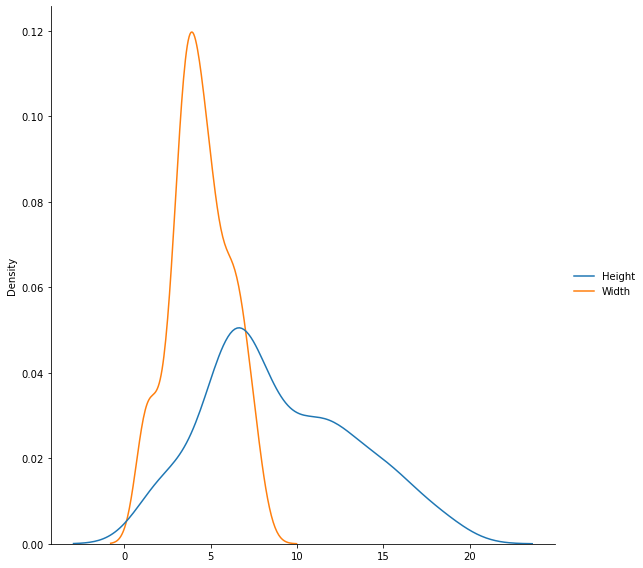

In [17]:
# all features following a normal distribution with mean 0 and standard deviation of 1
sns.displot(dataset.drop(columns="Weight"), kind='kde',aspect=1,height=8)
plt.show()

In [18]:
# normalizing the complete dataset
dataset = normalize_dataset(dataset)
dataset.head()

Height     Width  Weight
0  0.596579 -0.236529   242.0
1  0.821261 -0.066579   290.0
2  0.797341  0.165793   340.0
3  0.879771  0.022621   363.0
4  0.812835  0.426371   430.0

In [19]:
# checking mean and variance of each feature after standardizing the dataset
df = dataset.drop(columns = "Weight")
for feature in df:
    print("Mean of",feature,"is",round(find_mean(dataset,feature)))
    print("Standard Deviation of",feature,"is",round(find_standard_deviation(dataset,feature)))

Mean of Height is 0
Standard Deviation of Height is 1
Mean of Width is 0
Standard Deviation of Width is 1


## `Plot showing distribution of features after normalization`

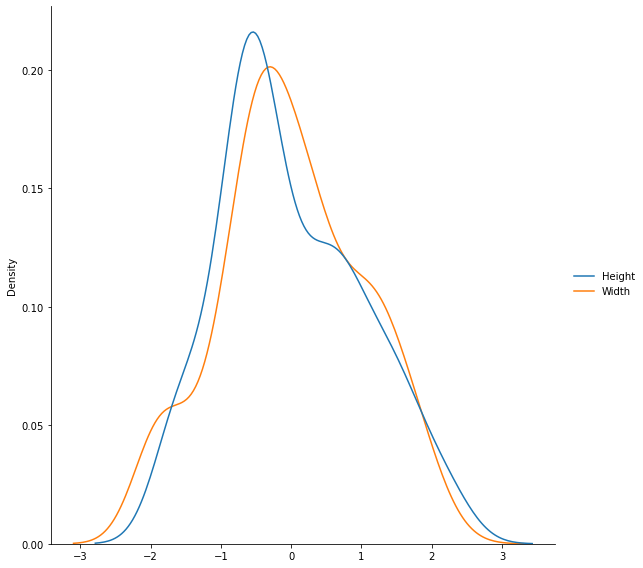

In [20]:
# all features following a normal distribution with mean 0 and standard deviation of 1
sns.displot(dataset.drop(columns="Weight"), kind='kde',aspect=1,height=8)
plt.show()

# ```Correlation Matrix```

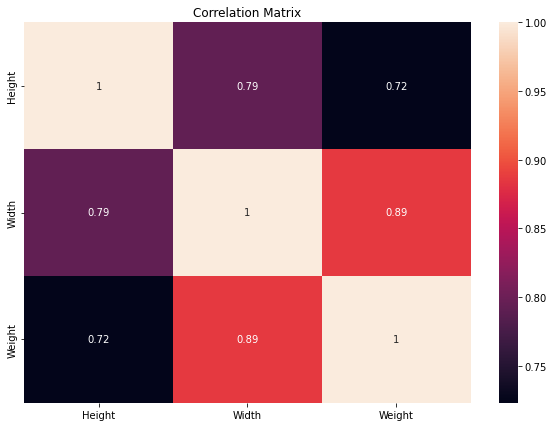

In [21]:
correlation = dataset.corr()
plt.subplots(figsize=(10,7))
heatmap = sns.heatmap(correlation,annot=True)
heatmap.set(title='Correlation Matrix')
plt.show()

## `Plotting Box Plots`

In [22]:
def plot_boxplot(dataframe,feature):
    red_circle = dict(markerfacecolor='red', marker='o')
    mean_shape = dict(markerfacecolor='green',marker='D',markeredgecolor='green')
    dataframe.boxplot(column=[feature],flierprops = red_circle,showmeans=True,meanprops=mean_shape,notch=True)
    plt.grid(False)
    plt.show()

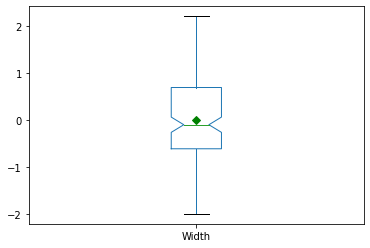

In [23]:
# red circles will be the outliers 
plot_boxplot(dataset,"Width")

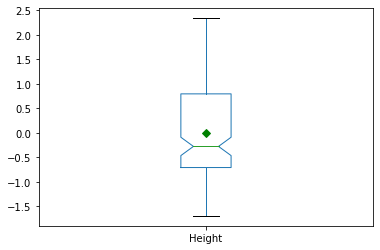

In [24]:
# red circles are the outliers 
plot_boxplot(dataset,"Height")

# ```Generating features for higher degree polynomials```

In [25]:
dataset.head()

Height     Width  Weight
0  0.596579 -0.236529   242.0
1  0.821261 -0.066579   290.0
2  0.797341  0.165793   340.0
3  0.879771  0.022621   363.0
4  0.812835  0.426371   430.0

In [26]:
def give_features(dataset,degree):
    features_deg = []
    feature_name = []
    for i in range(0,degree+1):
        j = degree - i
        vector_temp = []
        for ind in range(0,len(dataset)):
            x1 = dataset['Height'][ind]
            x2 = dataset['Width'][ind]
            vector_temp.append((x1**i)*(x2**j))
        features_deg.append(vector_temp)
        feature_name.append(f"X1^{i}_X2^{j}")
    return features_deg, feature_name

In [27]:
def give_dataset_with_all_features(dataset):
    df_new = pd.DataFrame()
    # this will give polynomial terms for all polynomials with degree from 2 to 9
    for degree in range(1,10):
        features_degree, feature_name = give_features(dataset,degree)
        # iterating over each feature associated with that degree
        for ind in range(len(features_degree)):
            name = feature_name[ind]
            df_new[name] = features_degree[ind]
            
    return df_new

In [28]:
df_temp = give_dataset_with_all_features(dataset)
# now add a column of ones
ones = [1 for i in range(len(dataset))]
df_new = pd.DataFrame()
df_new[f"X1^{0}_X2^{0}"] = ones
for feature in df_temp.columns:
    df_new[feature] = df_temp[feature]
df_new['Weight'] = dataset['Weight']
dataset = df_new
dataset.head()

X1^0_X2^0  X1^0_X2^1  X1^1_X2^0  X1^0_X2^2  X1^1_X2^1  X1^2_X2^0  \
0          1  -0.236529   0.596579   0.055946  -0.141108   0.355906   
1          1  -0.066579   0.821261   0.004433  -0.054679   0.674469   
2          1   0.165793   0.797341   0.027487   0.132194   0.635753   
3          1   0.022621   0.879771   0.000512   0.019901   0.773998   
4          1   0.426371   0.812835   0.181792   0.346569   0.660701   

   X1^0_X2^3  X1^1_X2^2  X1^2_X2^1  X1^3_X2^0  ...     X1^1_X2^8  \
0  -0.013233   0.033376  -0.084182   0.212326  ...  5.844430e-06   
1  -0.000295   0.003640  -0.044905   0.553915  ...  3.170854e-10   
2   0.004557   0.021917   0.105404   0.506912  ...  4.551739e-07   
3   0.000012   0.000450   0.017509   0.680941  ...  6.032047e-14   
4   0.077511   0.147767   0.281704   0.537041  ...  8.877810e-04   

      X1^2_X2^7     X1^3_X2^6     X1^4_X2^5     X1^5_X2^4  X1^6_X2^3  \
0 -1.474095e-05  3.717996e-05 -9.377615e-05  2.365243e-04  -0.000597   
1 -3.911293e-09  4.824634e-08 -5.951253e-07  7.340953e-06  -0.000091   
2  2.189046e-06  1.052768e-05  5.063026e-05  2.434937e-04   0.001171   
3  2.345972e-12  9.123905e-11  3.548451e-09  1.380056e-07   0.000005   
4  1.692467e-03  3.226523e-03  6.151049e-03  1.172637e-02   0.022355   

   X1^7_X2^2  X1^8_X2^1  X1^9_X2^0  Weight  
0   0.001505  -0.003795   0.009572   242.0  
1   0.001117  -0.013778   0.169953   290.0  
2   0.005632   0.027084   0.130256   340.0  
3   0.000209   0.008118   0.315739   363.0  
4   0.042618   0.081247   0.154889   430.0  

[5 rows x 56 columns]

# ```Train-Test Split```

In [29]:
def split_train_test(data,test_ratio):
    # np.random.seed() is very important as whenever we call the function it will randomly divide the indices
    # it might happen after many calls our model sees all the data and it leads to overfitting so to prevent it
    # seed function will randomly divide data only once and once the function is called it will not give other
    # permuatation of indices whenever called again,hence no overfitting
    np.random.seed(45)
    # it will give random permutation of indices from 0 to len(data)-1
    # now shuffled array will contain random number for eg [0,4,1,99,12,3...]
    shuffled = np.random.permutation(len(data))  
    test_set_size = int(len(data)*test_ratio)
    # it will give array of indices from index 0 to test_set_size-1
    test_indices = shuffled[:test_set_size]
    # it will give array of indices from index test_set_size till last
    train_indices = shuffled[test_set_size:]
    # it will return rows from data df corresponding to indices given in train and test indices array
    # so it is returning the train and test data respectively
    return data.iloc[train_indices], data.iloc[test_indices]

In [30]:
train_set, test_set = split_train_test(dataset,0.2)

In [31]:
print(len(train_set))

128


In [32]:
print(len(test_set))

31


In [33]:
train_set.head()

X1^0_X2^0  X1^0_X2^1  X1^1_X2^0  X1^0_X2^2  X1^1_X2^1  X1^2_X2^0  \
28           1   1.059756   1.853299   1.123084   1.964046   3.434718   
40           1  -0.634269  -0.584125   0.402297   0.370492   0.341202   
89           1  -0.531085  -0.724598   0.282051   0.384823   0.525042   
97           1  -0.352566  -0.607576   0.124303   0.214211   0.369148   
138          1   0.269275  -0.275936   0.072509  -0.074303   0.076141   

     X1^0_X2^3  X1^1_X2^2  X1^2_X2^1  X1^3_X2^0  ...  X1^1_X2^8  X1^2_X2^7  \
28    1.190195   2.081410   3.639965   6.365561  ...   2.948450   5.156243   
40   -0.255165  -0.234992  -0.216414  -0.199304  ...  -0.015300  -0.014090   
89   -0.149793  -0.204374  -0.278842  -0.380444  ...  -0.004586  -0.006257   
97   -0.043825  -0.075523  -0.130149  -0.224286  ...  -0.000145  -0.000250   
138   0.019525  -0.020008   0.020503  -0.021010  ...  -0.000008   0.000008   

     X1^3_X2^6  X1^4_X2^5  X1^5_X2^4  X1^6_X2^3  X1^7_X2^2   X1^8_X2^1  \
28    9.017225  15.769300  27.577314  48.227138  84.339500  147.492710   
40   -0.012977  -0.011951  -0.011006  -0.010136  -0.009334   -0.008596   
89   -0.008536  -0.011647  -0.015891  -0.021681  -0.029581   -0.040359   
97   -0.000431  -0.000742  -0.001279  -0.002205  -0.003799   -0.006547   
138  -0.000008   0.000008  -0.000008   0.000009  -0.000009    0.000009   

      X1^9_X2^0      Weight  
28   257.934887  850.000000  
40    -0.007917  398.326415  
89    -0.055065  135.000000  
97    -0.011282  145.000000  
138   -0.000009  567.000000  

[5 rows x 56 columns]

In [34]:
test_set.head()

X1^0_X2^0  X1^0_X2^1  X1^1_X2^0  X1^0_X2^2  X1^1_X2^1  X1^2_X2^0  \
99           1  -0.436768  -0.592480   0.190766   0.258776   0.351033   
0            1  -0.236529   0.596579   0.055946  -0.141108   0.355906   
147          1  -1.945312  -1.695083   3.784239   3.297465   2.873306   
133          1  -0.262117  -0.602661   0.068705   0.157967   0.363200   
80           1  -0.821595  -0.897181   0.675018   0.737120   0.804934   

     X1^0_X2^3  X1^1_X2^2  X1^2_X2^1  X1^3_X2^0  ...   X1^1_X2^8   X1^2_X2^7  \
99   -0.083320  -0.113025  -0.153320  -0.207980  ...   -0.000785   -0.001064   
0    -0.013233   0.033376  -0.084182   0.212326  ...    0.000006   -0.000015   
147  -7.361525  -6.414598  -5.589476  -4.870492  ... -347.620185 -302.905158   
133  -0.018009  -0.041406  -0.095201  -0.218886  ...   -0.000013   -0.000031   
80   -0.554592  -0.605614  -0.661330  -0.722172  ...   -0.186270   -0.203406   

      X1^3_X2^6   X1^4_X2^5   X1^5_X2^4   X1^6_X2^3   X1^7_X2^2   X1^8_X2^1  \
99    -0.001444   -0.001959   -0.002657   -0.003604   -0.004889   -0.006632   
0      0.000037   -0.000094    0.000237   -0.000597    0.001505   -0.003795   
147 -263.941907 -229.990571 -200.406459 -174.627805 -152.165107 -132.591828   
133   -0.000071   -0.000163   -0.000375   -0.000863   -0.001984   -0.004561   
80    -0.222120   -0.242555   -0.264870   -0.289238   -0.315847   -0.344905   

      X1^9_X2^0  Weight  
99    -0.008996   180.0  
0      0.009572   242.0  
147 -115.536296     7.0  
133   -0.010487   345.0  
80    -0.376636    85.0  

[5 rows x 56 columns]

# ```TASK 2: POLYNOMIAL REGRESSION```

- We will use this equation to update our regression model parameters

$$
\begin{equation}
\theta_{j} = \theta_{j} - {\alpha}\frac{\partial J(\theta)}{\partial \theta_{j}}  ,\quad\text {$0 \leq j \leq d$} 
\end{equation}
$$

$$
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_{j}} = \sum_{i=1}^n(h_{\theta}(x) - y^{(i)})x_{j}^{(i)} + 
\frac{\lambda}{2}{q}{\theta_{j}^{(q-1)}}, \quad h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1}  + \theta_{2}x_{2}  +  ... +  \theta_{d}x_{d}
\end{equation}
$$

- Repeat until convergence
$$
\begin{equation}
\theta_{j} = \theta_{j} - {\alpha}{({\sum_{i=1}^n(h_{\theta}(x) - y^{(i)})x_{j}^{(i)}+ \frac{\lambda}{2}{q}{\theta_{j}^{(q-1)}}})} ,\quad\text {$0 \leq j \leq d$}
\end{equation}
$$

- Such that it minimizes the cost function given by equation

$$
\begin{equation}
 J(w) = \frac{1}{2} \sum_{n=1}^{N} \left( y(x_n, w) - y^{(i)} \right)^2 + \frac{\lambda}{2} \sum_{j=1}^{M} \left(  \mathbf{w_{j}}^q \right)
\end{equation}
$$

- Where,
$$
\| \mathbf{w} \|_1 |= w_0^q + w_1^q + \ldots + w_d^q \quad\text {,for  d  features } 
$$

# ```Functions for finding error```

In [35]:
# function to find cost value, using the formula
def find_cost_regression(y_actual,y_predicted,theta_vector,Lambda,q):
    cost = 0
    for ind in range(len(y_predicted)):
        cost = cost + int((y_predicted[ind] - y_actual[ind])**2)
    cost = (1/2)*cost
    # adding the penalty term to the cost
    cost += (Lambda*0.5)*np.asarray([abs(w)**q for w in theta_vector])
    return cost[0] # returns the cost value instead of cost array

In [36]:
# function for finding mse and sse
def find_sse_mse(y_actual,y_predicted):
    sse = 0
    for index in range(len(y_actual)):
        sse += (y_actual[index]-y_predicted[index])**2
    mse = sse/len(y_actual)
    return sse, mse

In [37]:
# scatter plot for predicted and actual values
def plot_graph_predicted_values(y_actual,y_predicted,length):
    plt.scatter([index for index in range(0,length)],y_predicted)
    plt.scatter([index for index in range(0,length)],y_actual,color='orange')
    plt.legend(['Predicted Values','Actual Values'])
    plt.show()

In [38]:
# function for finding the predicted value
def find_predicted_value(weight_vector,x_train):
    return np.dot(x_train,weight_vector)

In [39]:
def print_cost_function(iteration_x_axis_batch,cost_y_axis_batch):
    plt.plot(iteration_x_axis_batch,cost_y_axis_batch)
    plt.xlabel("Iterations")
    plt.ylabel("Cost Value")
    plt.show()

In [40]:
def print_score(y_train_actual,x_train,y_test_actual,x_test,weight_vector,iteration_x_axis_batch,cost_y_axis_batch):
    print("Cost Function:\n================================================\n")
    print_cost_function(iteration_x_axis_batch,cost_y_axis_batch)
    
    sse_train, mse_train = find_sse_mse(y_train_actual,find_predicted_value(weight_vector,x_train))
    print("Train Result:\n================================================\n")
    print("SSE for this regression model is: ",sse_train)
    print("MSE for this regression model is: ",mse_train)
    plot_graph_predicted_values(y_train_actual,find_predicted_value(weight_vector,x_train),len(x_train))
    
    print("Test Result:\n================================================\n")
    sse_test, mse_test = find_sse_mse(y_test_actual,find_predicted_value(weight_vector,x_test))
    print("SSE for this regression model is: ",sse_test)
    print("MSE for this regression model is: ",mse_test)
    plot_graph_predicted_values(y_test_actual,find_predicted_value(weight_vector,x_test),len(x_test))
    
    return mse_train, mse_test

# ```Function for train data```

In [41]:
def give_train_data(degree):
    # features for polynomial with given degree
    num_columns_needed = int((degree+1)*(degree+2)*0.5)
    
    y_train = train_set["Weight"].to_numpy()
    x_train = train_set.iloc[:,:num_columns_needed].to_numpy()
    y_test = test_set["Weight"].to_numpy()
    x_test = test_set.iloc[:,:num_columns_needed].to_numpy()
    
    # initial weights before gradient descent
    weight_vector = np.random.randn(num_columns_needed)
    
    return x_train, y_train, x_test, y_test, weight_vector

# ```Batch Gradient Descent```

In [42]:
# defining max_iterations
max_iterations = 10000
learning_rate = 0.0000001
mse_train_degree_batch = []
mse_train_degree_stochastic = []
mse_test_degree_batch = []
mse_test_degree_stochastic = []

In [43]:
def batch_gradient_descent(degree,learning_rate,Lambda,q,iteration_x_axis_batch,cost_y_axis_batch):
    prev_cost = 0
    
    # get x_train and y_train vectors
    x_train_batch, y_train_batch, x_test_batch, y_test_batch, weight_vector = give_train_data(degree)
    
    for iteration in range(max_iterations):
        # will give the predicted value, after each iteration using updated weights
        
        y_predicted = np.dot(x_train_batch,weight_vector) 
        current_cost = find_cost_regression(y_train_batch,y_predicted,weight_vector,Lambda,q)
            
        # this loop will update all the parameters one by one
        for theta_j in range(len(weight_vector)):
             
            # defining the xj vector for the column corresponding the weight theta_j
            xj_vector = x_train_batch[:,theta_j]
            
            # defining the vector representing the difference between predicted and actual values
            difference_actual_predicted_vector = (y_predicted-y_train_batch).reshape(len(x_train_batch),-1)
            
            gradient =  np.dot(xj_vector,difference_actual_predicted_vector)
            gradient_regression = gradient + (Lambda/2)*q*((abs(weight_vector[theta_j]))**(q-1)) # adding gradient due to penalty term
            
            # for the bias term, don't penalize it
            if(theta_j == 0):
                weight_vector[theta_j] = weight_vector[theta_j] - learning_rate*gradient
            else:
                weight_vector[theta_j] = weight_vector[theta_j] - learning_rate*gradient_regression
            

        # adding cost to cost array after each iteration
        iteration_x_axis_batch.append(iteration)
        cost_y_axis_batch.append(current_cost)
    
    return weight_vector

# ```Stochastic Gradient Descent```

In [44]:
def stochastic_gradient_descent(degree,learning_rate,Lambda,q,iteration_x_axis_stochastic,cost_y_axis_stochastic):
    prev_cost = 0
    
    # get x_train and y_train vectors
    x_train_stochastic, y_train_stochastic, x_test_stochastic, y_test_stochastic, weight_vector = give_train_data(degree)
    
    for iteration in range(500):
        # will give the predicted value, after each iteration using updated weights
        
        y_predicted = np.dot(x_train_stochastic,weight_vector) 
        current_cost = find_cost_regression(y_train_stochastic,y_predicted,weight_vector,Lambda,q)
            
        # this loop will update all the parameters one by one
        for theta_j in range(len(weight_vector)):
             
            # this will iterate over each training data point and update the theta_j after each iteration
            for index in range(len(x_train_stochastic)):
                xj = x_train_stochastic[index,theta_j]
                y_predicted_itr = find_predicted_value(weight_vector,x_train_stochastic[index])
                difference_actual_predicted = (y_predicted_itr-y_train_stochastic[index])
                gradient = difference_actual_predicted*xj
                gradient_regression = gradient + (Lambda/2)*q*((abs(weight_vector[theta_j]))**(q-1)) # adding gradient due to penalty term
                
                # update theta_j after each and every data point
                # for the bias term, don't penalize it
                if(theta_j == 0):
                    weight_vector[theta_j] = weight_vector[theta_j] - learning_rate*gradient
                else:
                    weight_vector[theta_j] = weight_vector[theta_j] - learning_rate*gradient_regression
                
                # adding cost to cost array after each updation
                y_predicted = np.dot(x_train_stochastic,weight_vector)
                current_cost = find_cost_regression(y_train_stochastic,y_predicted,weight_vector,Lambda,q)
                iteration_x_axis_stochastic.append(iteration)
                cost_y_axis_stochastic.append(current_cost)

    return weight_vector

# ```Funtion for printing result of regression```

In [45]:
q_array = [0.5,1,2,4]

In [46]:
def print_result(learning_rate,degree,Lambda,q,mse_degree_batch,mse_degree_stochastic):
    iteration_x_axis_batch = []
    cost_y_axis_batch = []

    # for calling batch gradient descent function
    weight_vector_batch = batch_gradient_descent(degree,learning_rate,Lambda,q,iteration_x_axis_batch,cost_y_axis_batch)

    iteration_x_axis_stochastic = []
    cost_y_axis_stochastic = []

    # for calling stochastic gradient descent function
    weight_vector_stochastic =  stochastic_gradient_descent(degree,learning_rate,Lambda,q,iteration_x_axis_stochastic,cost_y_axis_stochastic)

    # for printing the results
    x_train_batch, y_train_batch, x_test_batch, y_test_batch, weight_vector_temp = give_train_data(degree)

    print("Batch Gradient Descent:\n================================================\n")
    mse_train_batch, mse_test_batch = print_score(y_train_batch,x_train_batch,y_test_batch,x_test_batch,weight_vector_batch,iteration_x_axis_batch,cost_y_axis_batch)
    mse_degree_batch.append(mse_test_batch)

    print("Stochastic Gradient Descent:\n================================================\n")
    mse_train_stochastic, mse_test_stochastic = print_score(y_train_batch,x_train_batch,y_test_batch,x_test_batch,weight_vector_stochastic,iteration_x_axis_stochastic,cost_y_axis_stochastic)
    mse_degree_stochastic.append(mse_test_stochastic)
    
    return mse_train_batch, mse_test_batch, mse_train_stochastic, mse_test_stochastic

# ```Test run for polynomial with degree 1```

In [47]:
mse_degree_1_batch = []
mse_degree_1_stochastic = []

### ```taking q as 0.5```

Batch Gradient Descent:

Cost Function:



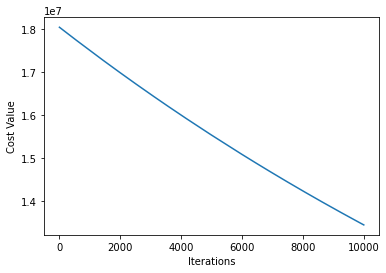

Train Result:

SSE for this regression model is:  26869483.071226966
MSE for this regression model is:  209917.83649396067


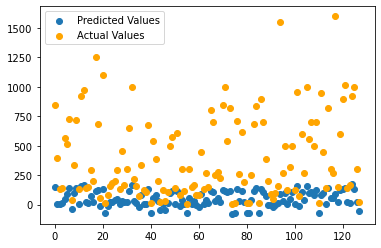

Test Result:

SSE for this regression model is:  7461854.359949142
MSE for this regression model is:  240704.9793531981


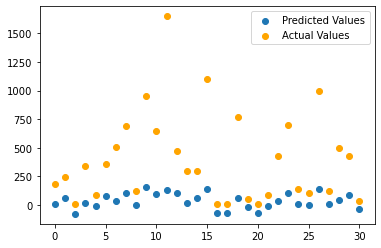

Stochastic Gradient Descent:

Cost Function:



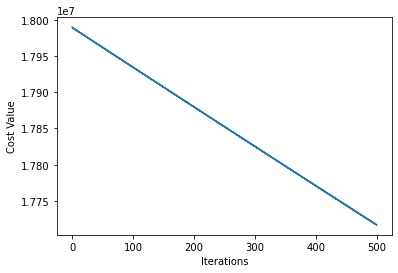

Train Result:

SSE for this regression model is:  35433914.60854944
MSE for this regression model is:  276827.4578792925


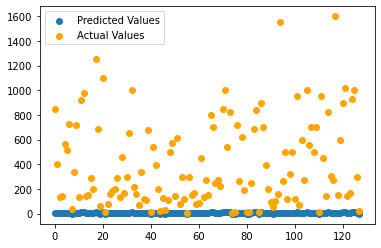

Test Result:

SSE for this regression model is:  9361187.312822973
MSE for this regression model is:  301973.78428461205


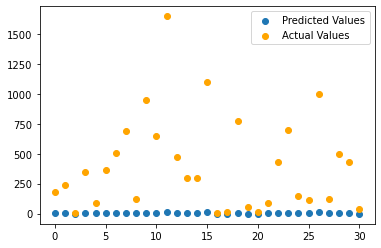

In [48]:
# constants
degree = 1
Lambda = 0.000001
q = 0.5

mse_train_batch, mse_test_batch, mse_train_stochastic, mse_test_stochastic = print_result(learning_rate,degree,Lambda,q,mse_degree_1_batch,mse_degree_1_stochastic)
mse_train_degree_batch.append(mse_train_batch)
mse_train_degree_stochastic.append(mse_train_stochastic)
mse_test_degree_batch.append(mse_test_batch)
mse_test_degree_stochastic.append(mse_test_stochastic)

### ```taking q as 1```

Batch Gradient Descent:

Cost Function:



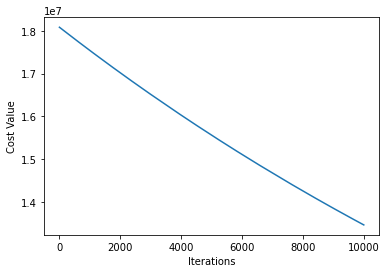

Train Result:

SSE for this regression model is:  26915097.808166917
MSE for this regression model is:  210274.20162630404


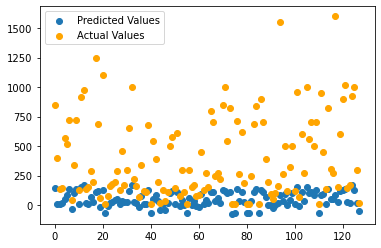

Test Result:

SSE for this regression model is:  7473047.318149713
MSE for this regression model is:  241066.0425209585


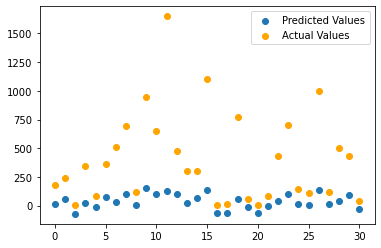

Stochastic Gradient Descent:

Cost Function:



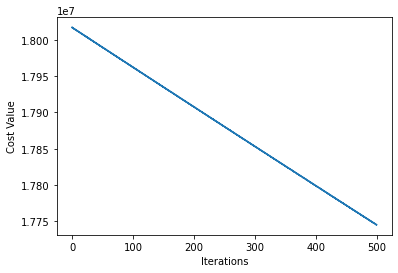

Train Result:

SSE for this regression model is:  35489704.84068633
MSE for this regression model is:  277263.31906786194


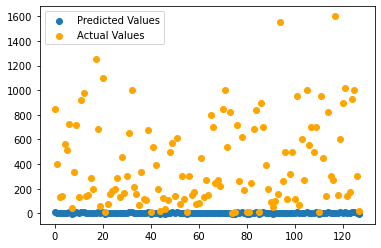

Test Result:

SSE for this regression model is:  9393197.511182202
MSE for this regression model is:  303006.37132845813


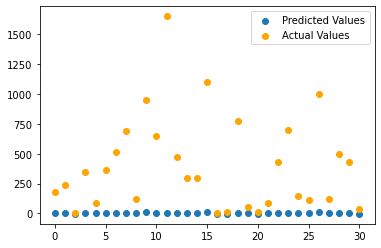

In [49]:
degree = 1
Lambda = 0.001
q = 1

mse_train_batch, mse_test_batch, mse_train_stochastic, mse_test_stochastic = print_result(learning_rate,degree,Lambda,q,mse_degree_1_batch,mse_degree_1_stochastic)

### ```taking q as 2```

Batch Gradient Descent:

Cost Function:



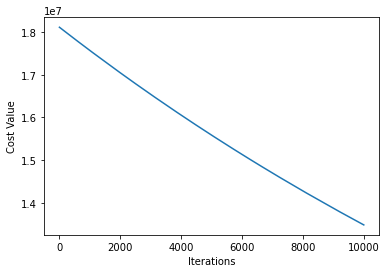

Train Result:

SSE for this regression model is:  26966273.444930356
MSE for this regression model is:  210674.0112885184


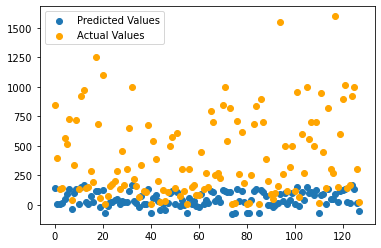

Test Result:

SSE for this regression model is:  7485283.580976915
MSE for this regression model is:  241460.76067667466


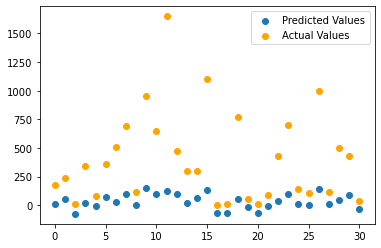

Stochastic Gradient Descent:

Cost Function:



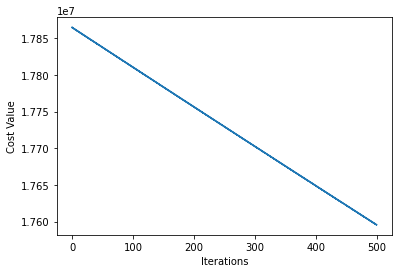

Train Result:

SSE for this regression model is:  35190778.892846115
MSE for this regression model is:  274927.9601003603


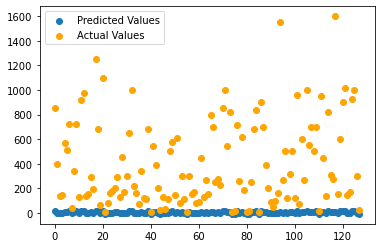

Test Result:

SSE for this regression model is:  9323018.794615913
MSE for this regression model is:  300742.5417618037


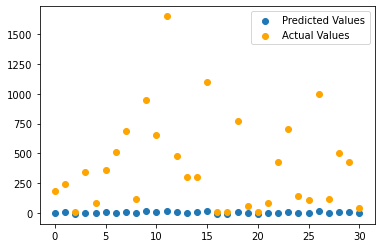

In [50]:
degree = 1
Lambda = 0.00001
q = 2

mse_train_batch, mse_test_batch, mse_train_stochastic, mse_test_stochastic = print_result(learning_rate,degree,Lambda,q,mse_degree_1_batch,mse_degree_1_stochastic)

### ```taking q as 4```

Batch Gradient Descent:

Cost Function:



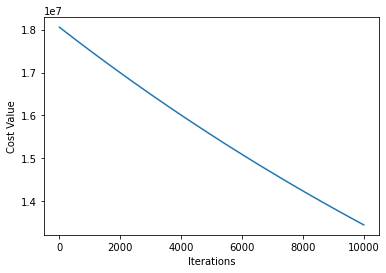

Train Result:

SSE for this regression model is:  26898704.23698264
MSE for this regression model is:  210146.12685142687


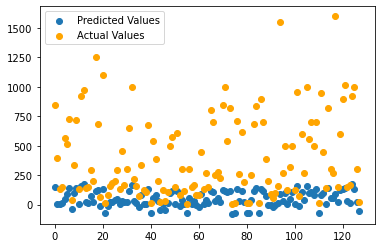

Test Result:

SSE for this regression model is:  7475479.589328915
MSE for this regression model is:  241144.5028815779


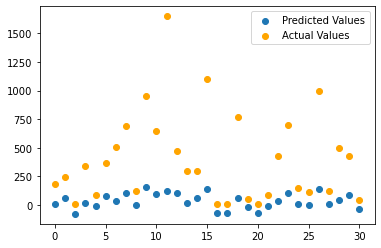

Stochastic Gradient Descent:

Cost Function:



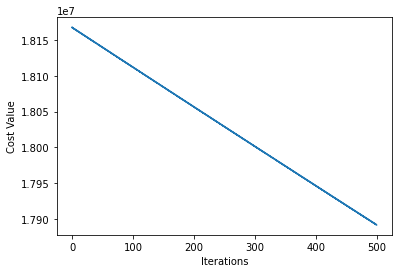

Train Result:

SSE for this regression model is:  35784063.14502129
MSE for this regression model is:  279562.9933204788


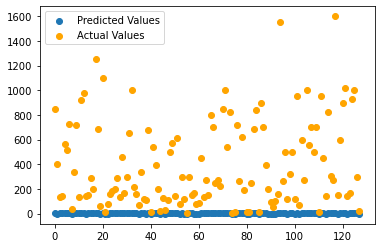

Test Result:

SSE for this regression model is:  9443936.626304073
MSE for this regression model is:  304643.11697755073


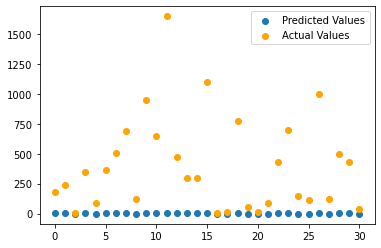

In [51]:
degree = 1
Lambda = 0.00001
q = 4

mse_train_batch, mse_test_batch, mse_train_stochastic, mse_test_stochastic = print_result(learning_rate,degree,Lambda,q,mse_degree_1_batch,mse_degree_1_stochastic)

## ```Plot comparing MSE values with different q for degree 1 polynomial```

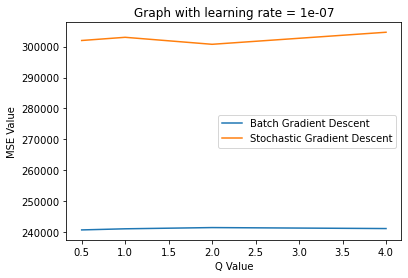

In [52]:
plt.title(f"Graph with learning rate = {learning_rate}")
plt.plot(q_array,mse_degree_1_batch,label='Batch Gradient Descent')
plt.plot(q_array,mse_degree_1_stochastic,label='Stochastic Gradient Descent')
plt.xlabel("Q Value")
plt.ylabel("MSE Value")
plt.legend()
plt.show()

### ```we see that for batch gradient descent best model here is one with least MSE, which is with q as 0.5 and for stochastic gradient descent best model here is one with q as 2```

# ```Test run for polynomial with degree 2```

In [53]:
mse_degree_2_batch = []
mse_degree_2_stochastic = []

### ```taking q as 0.5```

Batch Gradient Descent:

Cost Function:



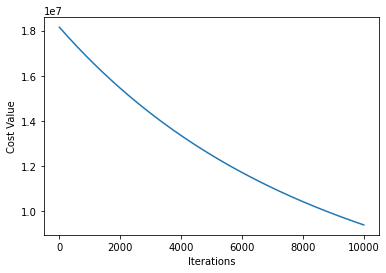

Train Result:

SSE for this regression model is:  18802297.957295403
MSE for this regression model is:  146892.95279137034


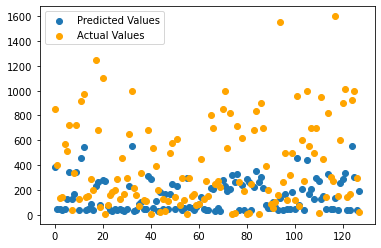

Test Result:

SSE for this regression model is:  5831749.06649765
MSE for this regression model is:  188120.93762895645


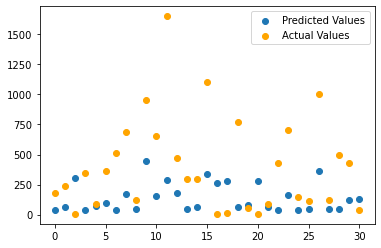

Stochastic Gradient Descent:

Cost Function:



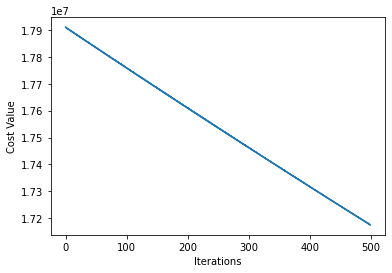

Train Result:

SSE for this regression model is:  34350590.64407405
MSE for this regression model is:  268363.98940682854


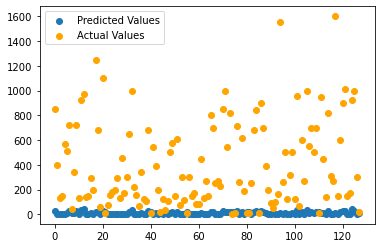

Test Result:

SSE for this regression model is:  9138977.391861212
MSE for this regression model is:  294805.7223181036


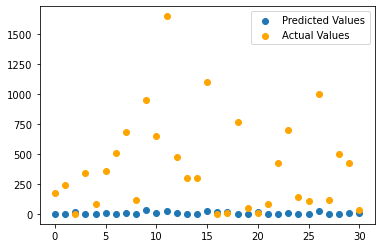

In [54]:
# constants
degree = 2
Lambda = 0.01
q = 0.5

mse_train_batch, mse_test_batch, mse_train_stochastic, mse_test_stochastic = print_result(learning_rate,degree,Lambda,q,mse_degree_2_batch,mse_degree_2_stochastic)
mse_train_degree_batch.append(mse_train_batch)
mse_train_degree_stochastic.append(mse_train_stochastic)
mse_test_degree_batch.append(mse_test_batch)
mse_test_degree_stochastic.append(mse_test_stochastic)

### ```taking q as 1```

Batch Gradient Descent:

Cost Function:



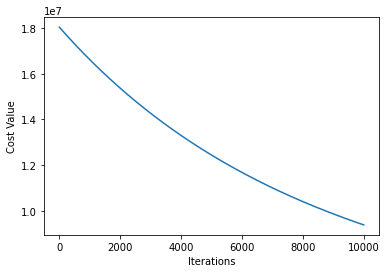

Train Result:

SSE for this regression model is:  18763259.695845425
MSE for this regression model is:  146587.96637379238


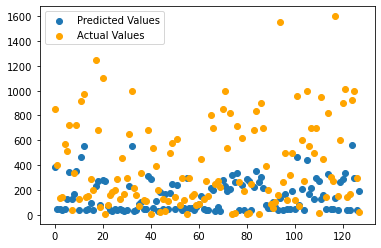

Test Result:

SSE for this regression model is:  5837408.486275673
MSE for this regression model is:  188303.49955727978


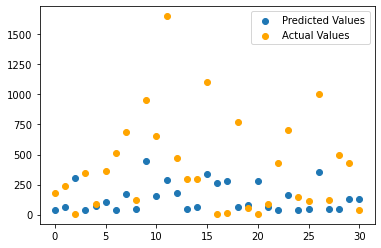

Stochastic Gradient Descent:

Cost Function:



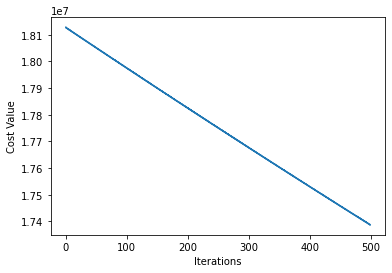

Train Result:

SSE for this regression model is:  34772910.757832095
MSE for this regression model is:  271663.36529556324


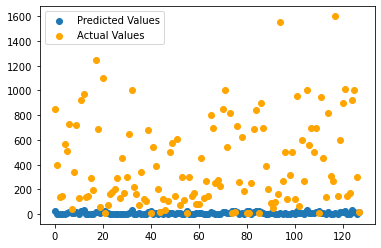

Test Result:

SSE for this regression model is:  9229576.61797924
MSE for this regression model is:  297728.2779993303


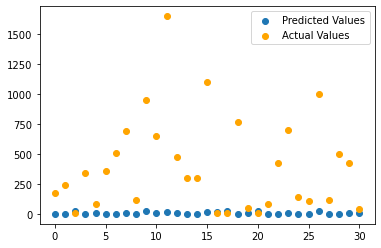

(146587.96637379238, 188303.49955727978, 271663.36529556324, 297728.2779993303)

In [55]:
# constants
degree = 2
Lambda = 0.000000001
q = 1

print_result(learning_rate,degree,Lambda,q,mse_degree_2_batch,mse_degree_2_stochastic)

### ```taking q as 2```

Batch Gradient Descent:

Cost Function:



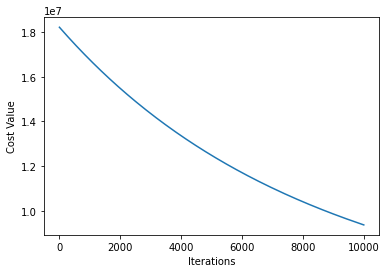

Train Result:

SSE for this regression model is:  18756280.78440201
MSE for this regression model is:  146533.4436281407


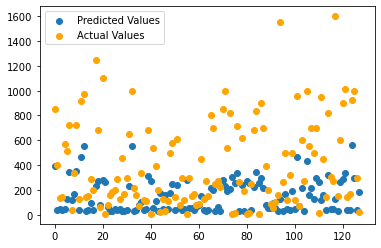

Test Result:

SSE for this regression model is:  5834728.486012104
MSE for this regression model is:  188217.04793587432


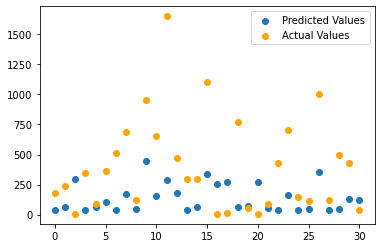

Stochastic Gradient Descent:

Cost Function:



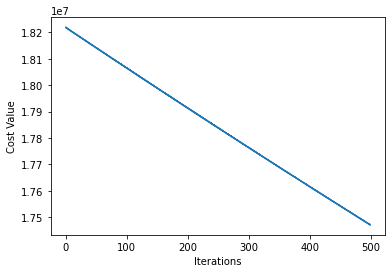

Train Result:

SSE for this regression model is:  34941888.11786798
MSE for this regression model is:  272983.50092084357


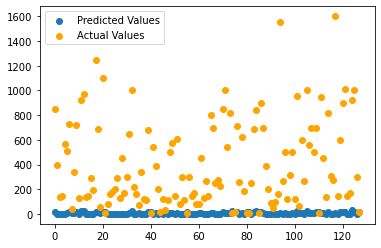

Test Result:

SSE for this regression model is:  9270668.718882093
MSE for this regression model is:  299053.8296413578


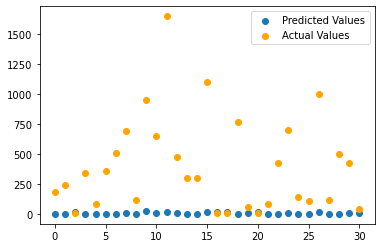

(146533.4436281407, 188217.04793587432, 272983.50092084357, 299053.8296413578)

In [56]:
# constants
degree = 2
Lambda = 0.000000001
q = 2

print_result(learning_rate,degree,Lambda,q,mse_degree_2_batch,mse_degree_2_stochastic)

### ```taking q as 4```

Batch Gradient Descent:

Cost Function:



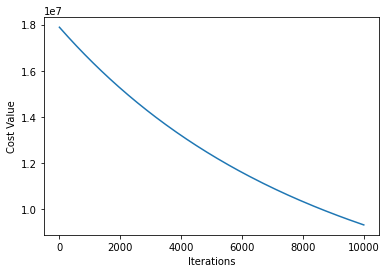

Train Result:

SSE for this regression model is:  18662222.624552064
MSE for this regression model is:  145798.614254313


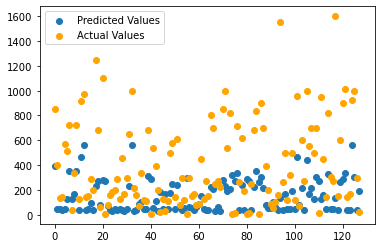

Test Result:

SSE for this regression model is:  5811736.539922881
MSE for this regression model is:  187475.3722555768


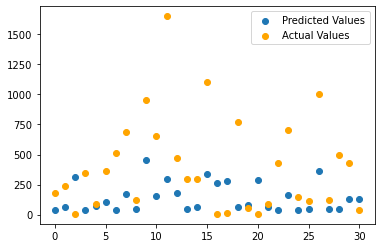

Stochastic Gradient Descent:

Cost Function:



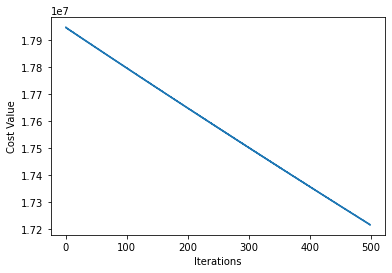

Train Result:

SSE for this regression model is:  34433254.81945179
MSE for this regression model is:  269009.8032769671


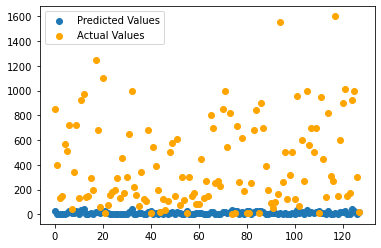

Test Result:

SSE for this regression model is:  9160854.42226649
MSE for this regression model is:  295511.43297633843


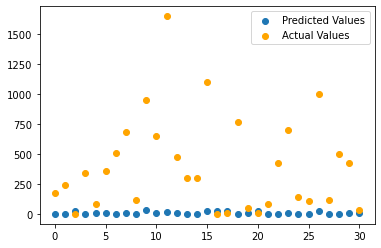

(145798.614254313, 187475.3722555768, 269009.8032769671, 295511.43297633843)

In [57]:
# constants
degree = 2
Lambda = 0.000000001
q = 4

print_result(learning_rate,degree,Lambda,q,mse_degree_2_batch,mse_degree_2_stochastic)

## ```Plot comparing MSE values with different q for degree 2 polynomial```

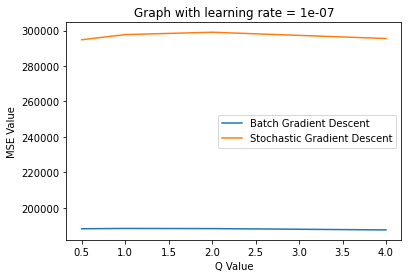

In [58]:
plt.title(f"Graph with learning rate = {learning_rate}")
plt.plot(q_array,mse_degree_2_batch,label='Batch Gradient Descent')
plt.plot(q_array,mse_degree_2_stochastic,label='Stochastic Gradient Descent')
plt.xlabel("Q Value")
plt.ylabel("MSE Value")
plt.legend()
plt.show()

### ```we see that for batch gradient descent best model here is one with least MSE, which is with q as 4 and for stochastic gradient descent best model here is one with q as 0.5```

# ```Test run for polynomial with degree 3```

In [59]:
mse_degree_3_batch = []
mse_degree_3_stochastic = []

### ```taking q as 0.5```

Batch Gradient Descent:

Cost Function:



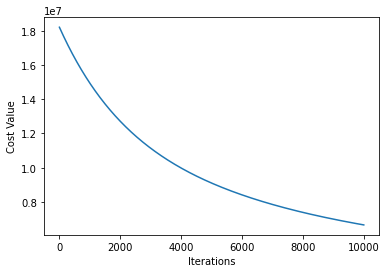

Train Result:

SSE for this regression model is:  13323358.491885856
MSE for this regression model is:  104088.73821785825


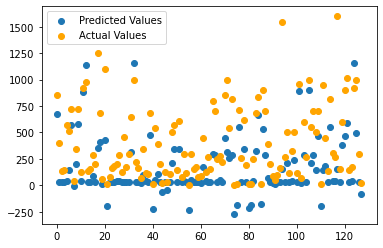

Test Result:

SSE for this regression model is:  4232344.597113655
MSE for this regression model is:  136527.2450681824


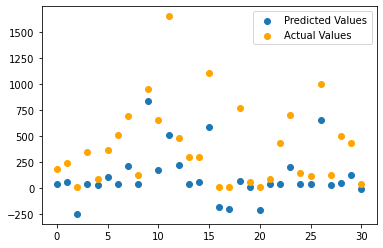

Stochastic Gradient Descent:

Cost Function:



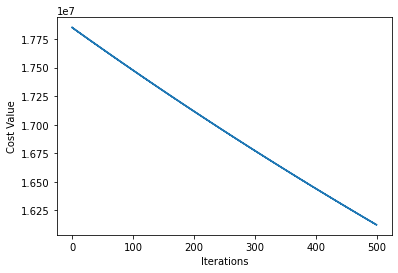

Train Result:

SSE for this regression model is:  32246269.350408256
MSE for this regression model is:  251923.9793000645


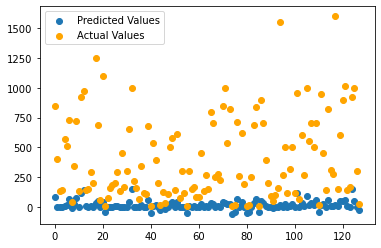

Test Result:

SSE for this regression model is:  8780924.319963977
MSE for this regression model is:  283255.6232246444


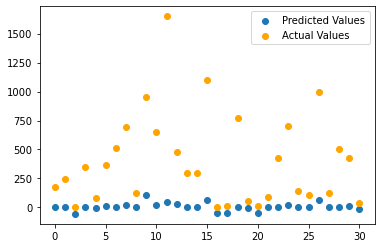

In [60]:
# constants
degree = 3
Lambda = 0.000000001
q = 0.5

mse_train_batch, mse_test_batch, mse_train_stochastic, mse_test_stochastic = print_result(learning_rate,degree,Lambda,q,mse_degree_3_batch,mse_degree_3_stochastic)
mse_train_degree_batch.append(mse_train_batch)
mse_train_degree_stochastic.append(mse_train_stochastic)
mse_test_degree_batch.append(mse_test_batch)
mse_test_degree_stochastic.append(mse_test_stochastic)

### ```taking q as 1```

Batch Gradient Descent:

Cost Function:



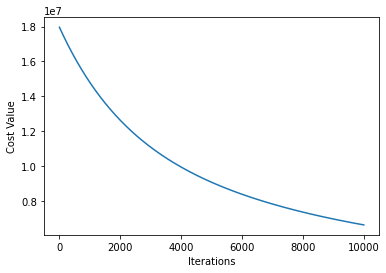

Train Result:

SSE for this regression model is:  13245417.315749839
MSE for this regression model is:  103479.82277929562


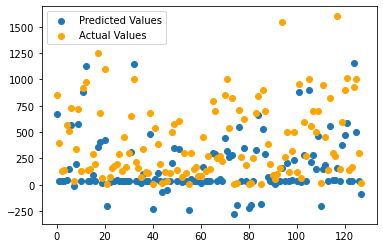

Test Result:

SSE for this regression model is:  4216307.179174254
MSE for this regression model is:  136009.9090056211


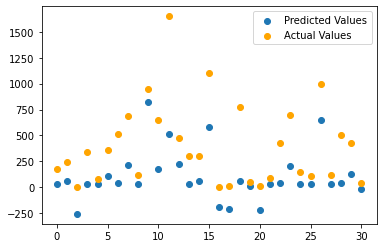

Stochastic Gradient Descent:

Cost Function:



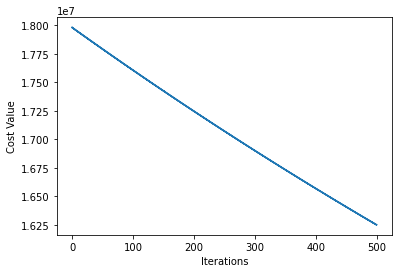

Train Result:

SSE for this regression model is:  32498664.40596765
MSE for this regression model is:  253895.81567162226


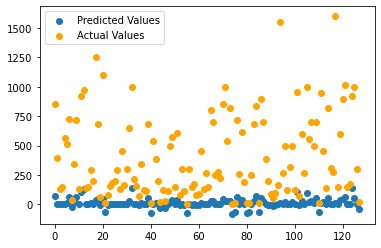

Test Result:

SSE for this regression model is:  8799094.568621455
MSE for this regression model is:  283841.76027811144


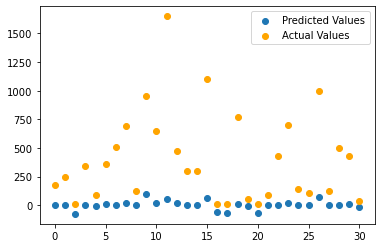

(103479.82277929562, 136009.9090056211, 253895.81567162226, 283841.76027811144)

In [61]:
# constants
degree = 3
Lambda = 0.000000001
q = 1

print_result(learning_rate,degree,Lambda,q,mse_degree_3_batch,mse_degree_3_stochastic)

### ```taking q as 2```

Batch Gradient Descent:

Cost Function:



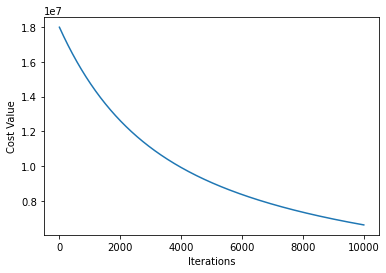

Train Result:

SSE for this regression model is:  13211772.455946287
MSE for this regression model is:  103216.97231208037


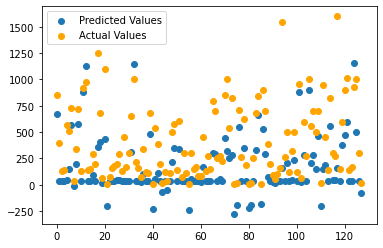

Test Result:

SSE for this regression model is:  4206114.61213926
MSE for this regression model is:  135681.1165206213


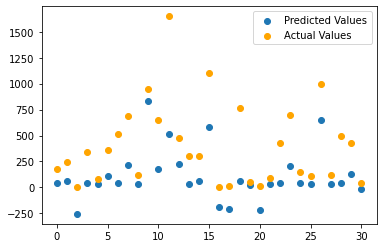

Stochastic Gradient Descent:

Cost Function:



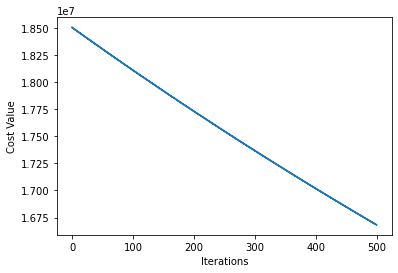

Train Result:

SSE for this regression model is:  33363947.09674939
MSE for this regression model is:  260655.83669335462


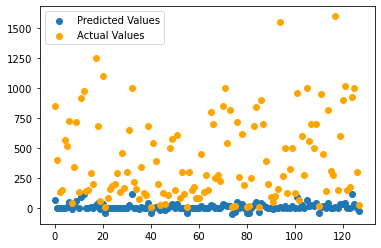

Test Result:

SSE for this regression model is:  9020648.892030515
MSE for this regression model is:  290988.6739364682


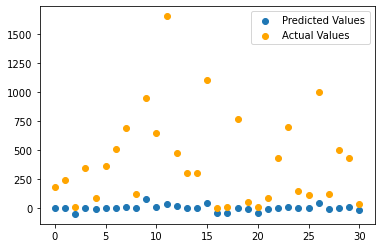

(103216.97231208037, 135681.1165206213, 260655.83669335462, 290988.6739364682)

In [62]:
# constants
degree = 3
Lambda = 0.000000001
q = 2

print_result(learning_rate,degree,Lambda,q,mse_degree_3_batch,mse_degree_3_stochastic)

### ```taking q as 4```

Batch Gradient Descent:

Cost Function:



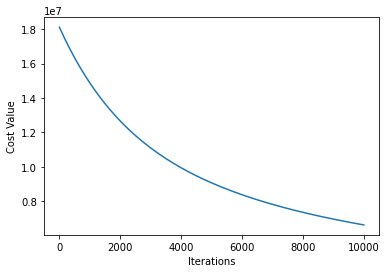

Train Result:

SSE for this regression model is:  13251883.40535921
MSE for this regression model is:  103530.33910436883


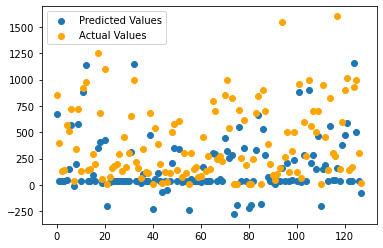

Test Result:

SSE for this regression model is:  4213474.016472734
MSE for this regression model is:  135918.51666041077


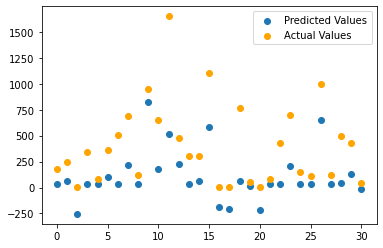

Stochastic Gradient Descent:

Cost Function:



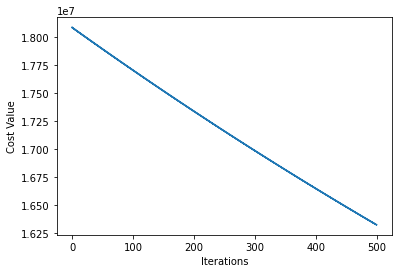

Train Result:

SSE for this regression model is:  32648964.525600046
MSE for this regression model is:  255070.03535625036


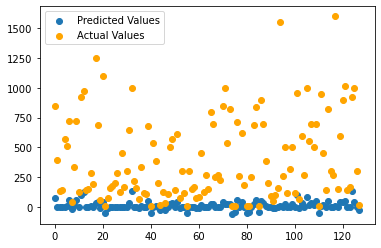

Test Result:

SSE for this regression model is:  8861541.602780081
MSE for this regression model is:  285856.1807348413


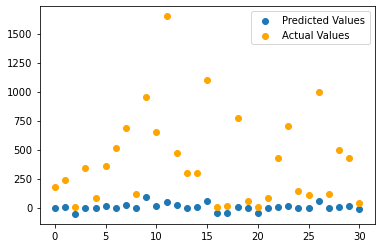

(103530.33910436883, 135918.51666041077, 255070.03535625036, 285856.1807348413)

In [63]:
# constants
degree = 3
Lambda = 0.000000001
q = 4

print_result(learning_rate,degree,Lambda,q,mse_degree_3_batch,mse_degree_3_stochastic)

## ```Plot comparing MSE values with different q for degree 3 polynomial```

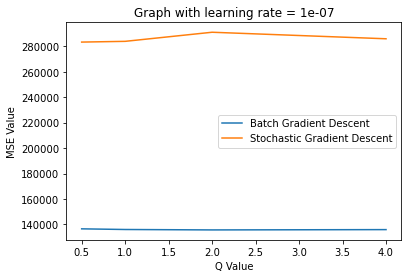

In [64]:
plt.title(f"Graph with learning rate = {learning_rate}")
plt.plot(q_array,mse_degree_3_batch,label='Batch Gradient Descent')
plt.plot(q_array,mse_degree_3_stochastic,label='Stochastic Gradient Descent')
plt.xlabel("Q Value")
plt.ylabel("MSE Value")
plt.legend()
plt.show()

### ```we see that for batch gradient descent best model here is one with least MSE, which is with q as 0.5 and for stochastic gradient descent best model here is one with q as 0.5```

# ```Test run for polynomial with degree 4```

In [65]:
mse_degree_4_batch = []
mse_degree_4_stochastic = []

### ```taking q as 0.5```

Batch Gradient Descent:

Cost Function:



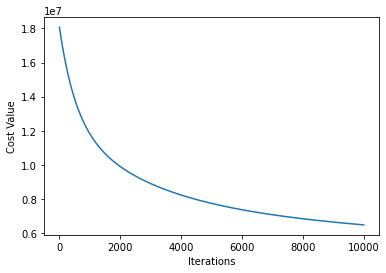

Train Result:

SSE for this regression model is:  12961724.072054153
MSE for this regression model is:  101263.46931292307


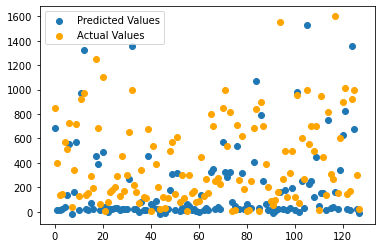

Test Result:

SSE for this regression model is:  3338815.9700219994
MSE for this regression model is:  107703.74096845159


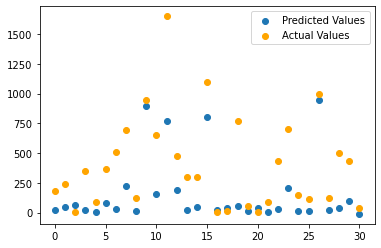

Stochastic Gradient Descent:

Cost Function:



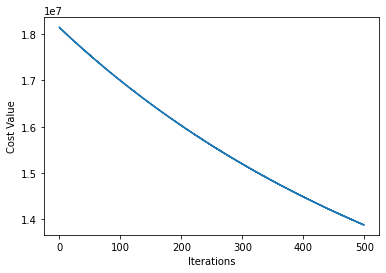

Train Result:

SSE for this regression model is:  27763833.478387184
MSE for this regression model is:  216904.94904989988


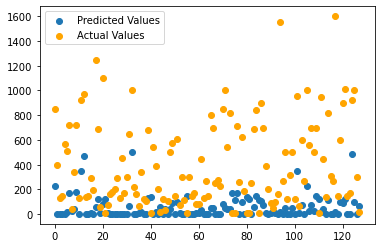

Test Result:

SSE for this regression model is:  8035943.733433974
MSE for this regression model is:  259223.99140109593


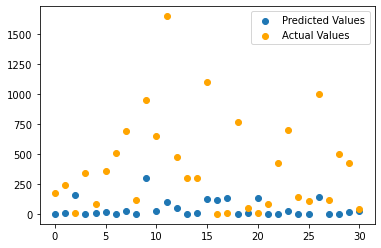

In [66]:
# constants
degree = 4
Lambda = 0.000000001
q = 0.5

mse_train_batch, mse_test_batch, mse_train_stochastic, mse_test_stochastic = print_result(learning_rate,degree,Lambda,q,mse_degree_4_batch,mse_degree_4_stochastic)
mse_train_degree_batch.append(mse_train_batch)
mse_train_degree_stochastic.append(mse_train_stochastic)
mse_test_degree_batch.append(mse_test_batch)
mse_test_degree_stochastic.append(mse_test_stochastic)

### ```taking q as 1```

Batch Gradient Descent:

Cost Function:



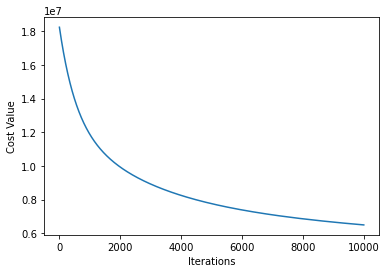

Train Result:

SSE for this regression model is:  12999576.066242643
MSE for this regression model is:  101559.18801752065


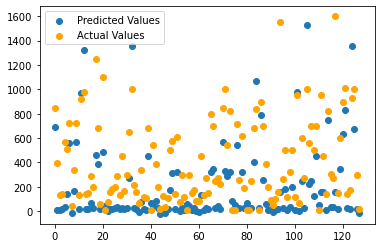

Test Result:

SSE for this regression model is:  3354410.6092635933
MSE for this regression model is:  108206.79384721268


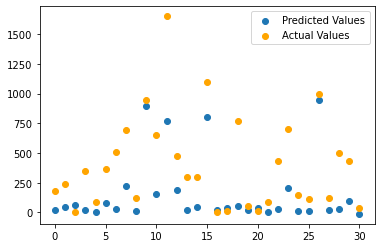

Stochastic Gradient Descent:

Cost Function:



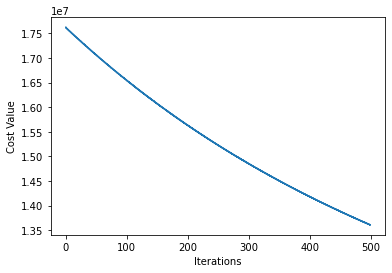

Train Result:

SSE for this regression model is:  27214263.096554894
MSE for this regression model is:  212611.4304418351


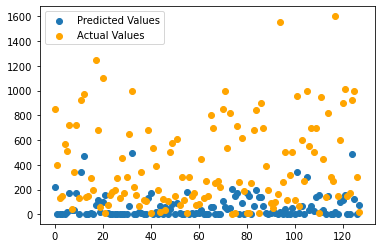

Test Result:

SSE for this regression model is:  7812205.748498377
MSE for this regression model is:  252006.63704833476


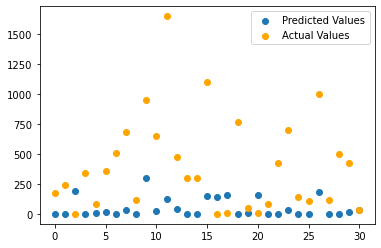

(101559.18801752065, 108206.79384721268, 212611.4304418351, 252006.63704833476)

In [67]:
# constants
degree = 4
Lambda = 0.000000001
q = 1

print_result(learning_rate,degree,Lambda,q,mse_degree_4_batch,mse_degree_4_stochastic)

### ```taking q as 2```

Batch Gradient Descent:

Cost Function:



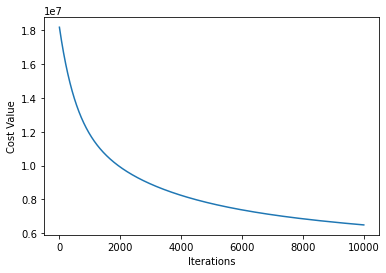

Train Result:

SSE for this regression model is:  12998659.761922615
MSE for this regression model is:  101552.02939002043


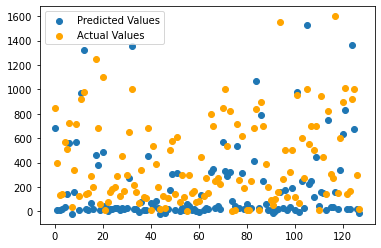

Test Result:

SSE for this regression model is:  3344957.0154344994
MSE for this regression model is:  107901.8392075645


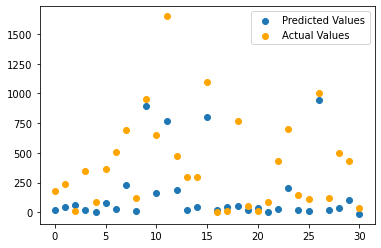

Stochastic Gradient Descent:

Cost Function:



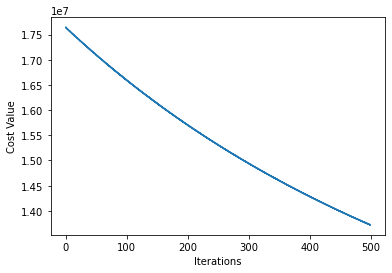

Train Result:

SSE for this regression model is:  27441946.01280054
MSE for this regression model is:  214390.20322500422


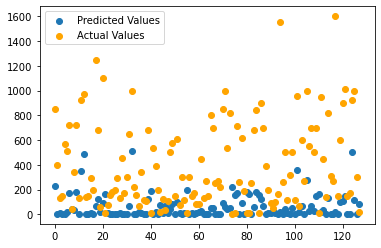

Test Result:

SSE for this regression model is:  7926496.30296821
MSE for this regression model is:  255693.42912800677


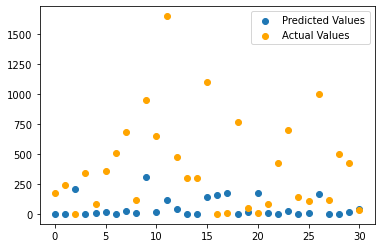

(101552.02939002043, 107901.8392075645, 214390.20322500422, 255693.42912800677)

In [68]:
# constants
degree = 4
Lambda = 0.000000001
q = 2

print_result(learning_rate,degree,Lambda,q,mse_degree_4_batch,mse_degree_4_stochastic)

### ```taking q as 4```

Batch Gradient Descent:

Cost Function:



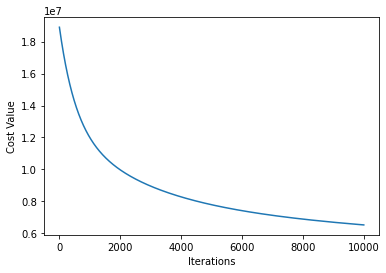

Train Result:

SSE for this regression model is:  13052562.42309284
MSE for this regression model is:  101973.14393041281


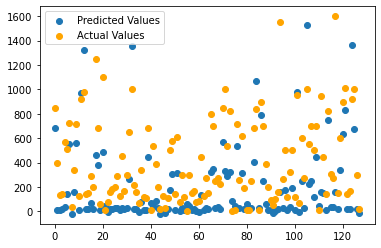

Test Result:

SSE for this regression model is:  3355829.175930314
MSE for this regression model is:  108252.5540622682


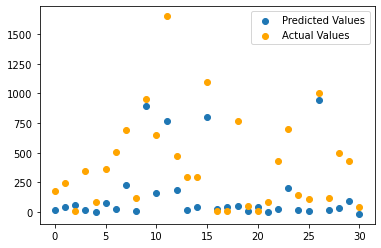

Stochastic Gradient Descent:

Cost Function:



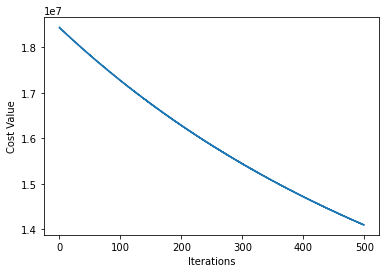

Train Result:

SSE for this regression model is:  28198076.324356426
MSE for this regression model is:  220297.47128403457


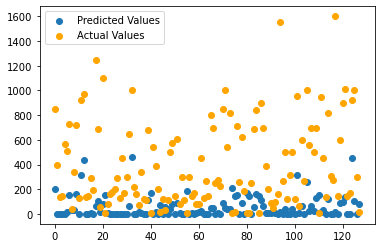

Test Result:

SSE for this regression model is:  8067888.533831621
MSE for this regression model is:  260254.46883327808


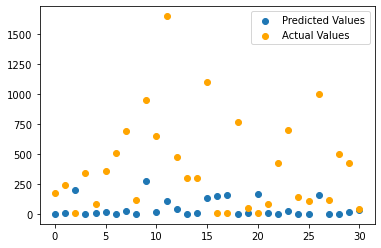

(101973.14393041281, 108252.5540622682, 220297.47128403457, 260254.46883327808)

In [69]:
# constants
degree = 4
Lambda = 0.000000001
q = 4

print_result(learning_rate,degree,Lambda,q,mse_degree_4_batch,mse_degree_4_stochastic)

## ```Plot comparing MSE values with different q for degree 4 polynomial```

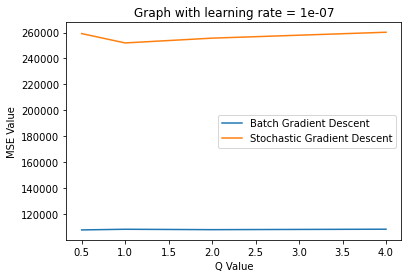

In [70]:
plt.title(f"Graph with learning rate = {learning_rate}")
plt.plot(q_array,mse_degree_4_batch,label='Batch Gradient Descent')
plt.plot(q_array,mse_degree_4_stochastic,label='Stochastic Gradient Descent')
plt.xlabel("Q Value")
plt.ylabel("MSE Value")
plt.legend()
plt.show()

### ```we see that for batch gradient descent best model here is one with least MSE, which is with q as 1 and for stochastic gradient descent best model here is one with q as 1```

# ```Test run for polynomial with degree 5```

In [71]:
mse_degree_5_batch = []
mse_degree_5_stochastic = []

### ```taking q as 0.5```

Batch Gradient Descent:

Cost Function:



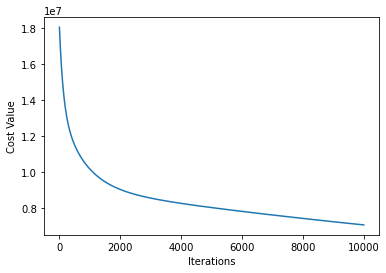

Train Result:

SSE for this regression model is:  14171969.073790114
MSE for this regression model is:  110718.50838898527


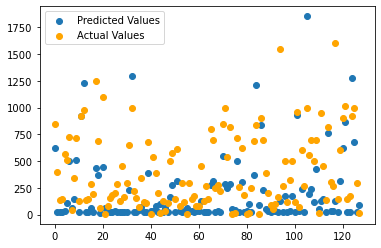

Test Result:

SSE for this regression model is:  3414138.6061278004
MSE for this regression model is:  110133.50342347744


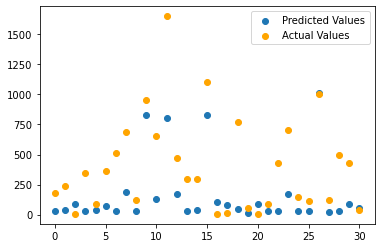

Stochastic Gradient Descent:

Cost Function:



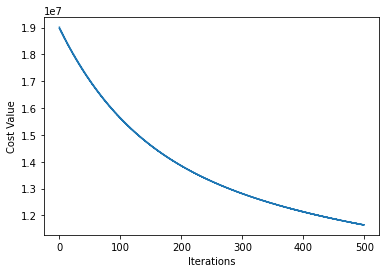

Train Result:

SSE for this regression model is:  23289260.157782495
MSE for this regression model is:  181947.34498267574


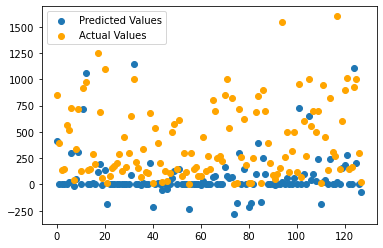

Test Result:

SSE for this regression model is:  6840949.805007756
MSE for this regression model is:  220675.8001615405


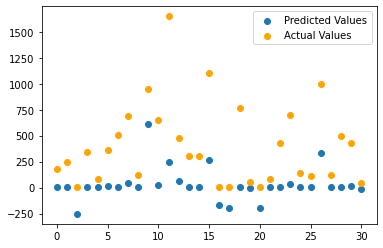

In [72]:
# constants
degree = 5
Lambda = 0.000000001
q = 0.5

mse_train_batch, mse_test_batch, mse_train_stochastic, mse_test_stochastic = print_result(learning_rate,degree,Lambda,q,mse_degree_5_batch,mse_degree_5_stochastic)
mse_train_degree_batch.append(mse_train_batch)
mse_train_degree_stochastic.append(mse_train_stochastic)
mse_test_degree_batch.append(mse_test_batch)
mse_test_degree_stochastic.append(mse_test_stochastic)

### ```taking q as 1```

Batch Gradient Descent:

Cost Function:



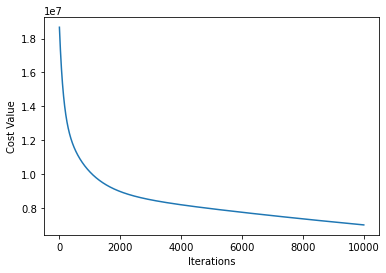

Train Result:

SSE for this regression model is:  14030678.829058234
MSE for this regression model is:  109614.67835201745


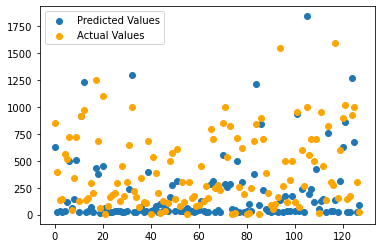

Test Result:

SSE for this regression model is:  3372857.444586066
MSE for this regression model is:  108801.85305116342


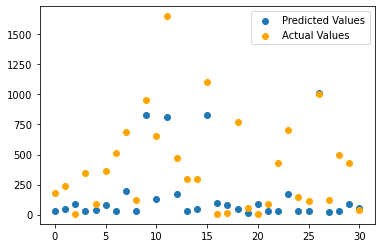

Stochastic Gradient Descent:

Cost Function:



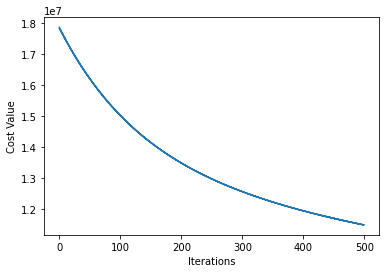

Train Result:

SSE for this regression model is:  22980526.822205927
MSE for this regression model is:  179535.3657984838


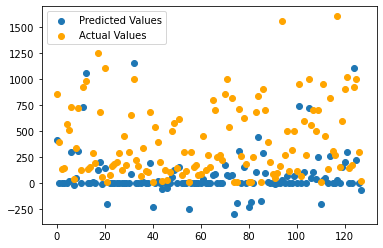

Test Result:

SSE for this regression model is:  6706080.816611822
MSE for this regression model is:  216325.1876326394


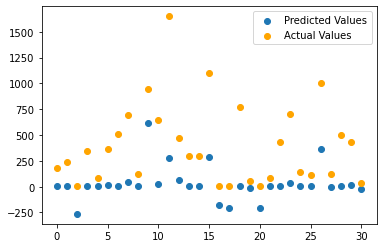

(109614.67835201745, 108801.85305116342, 179535.3657984838, 216325.1876326394)

In [73]:
# constants
degree = 5
Lambda = 0.000000001
q = 1

print_result(learning_rate,degree,Lambda,q,mse_degree_5_batch,mse_degree_5_stochastic)

### ```taking q as 2```

Batch Gradient Descent:

Cost Function:



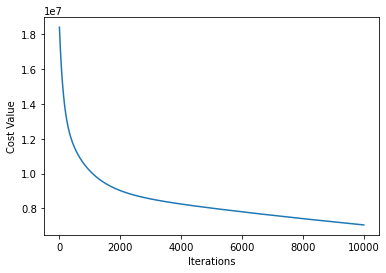

Train Result:

SSE for this regression model is:  14114239.330455914
MSE for this regression model is:  110267.49476918683


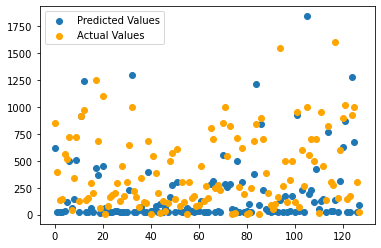

Test Result:

SSE for this regression model is:  3392262.6739781084
MSE for this regression model is:  109427.82819284221


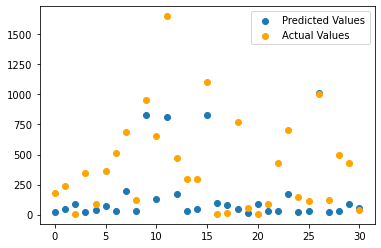

Stochastic Gradient Descent:

Cost Function:



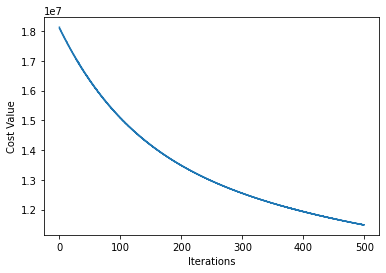

Train Result:

SSE for this regression model is:  22962652.800371204
MSE for this regression model is:  179395.72500290003


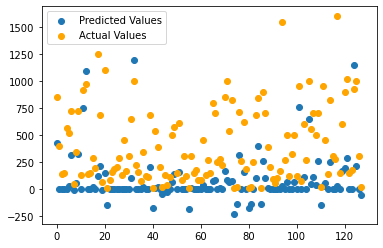

Test Result:

SSE for this regression model is:  6743046.205094023
MSE for this regression model is:  217517.61951916202


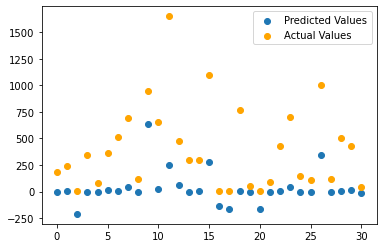

(110267.49476918683,
 109427.82819284221,
 179395.72500290003,
 217517.61951916202)

In [74]:
# constants
degree = 5
Lambda = 0.000000001
q = 2

print_result(learning_rate,degree,Lambda,q,mse_degree_5_batch,mse_degree_5_stochastic)

### ```taking q as 4```

Batch Gradient Descent:

Cost Function:



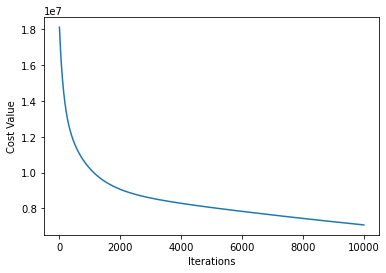

Train Result:

SSE for this regression model is:  14165566.288371947
MSE for this regression model is:  110668.48662790583


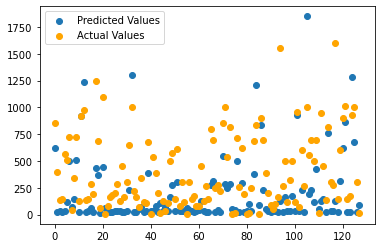

Test Result:

SSE for this regression model is:  3393236.330903354
MSE for this regression model is:  109459.23648075336


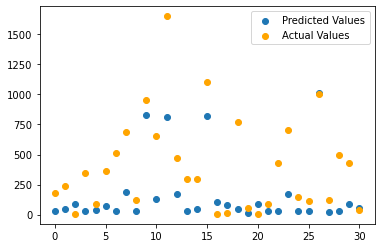

Stochastic Gradient Descent:

Cost Function:



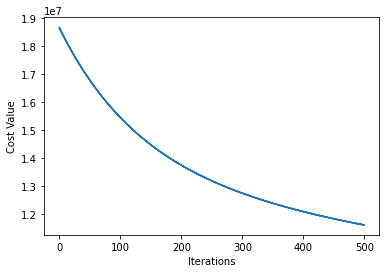

Train Result:

SSE for this regression model is:  23218885.25768634
MSE for this regression model is:  181397.54107567453


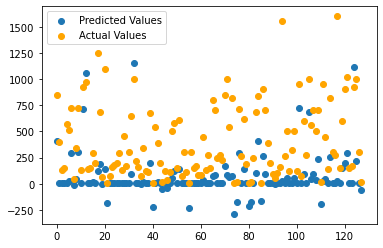

Test Result:

SSE for this regression model is:  6779932.391133798
MSE for this regression model is:  218707.49648818705


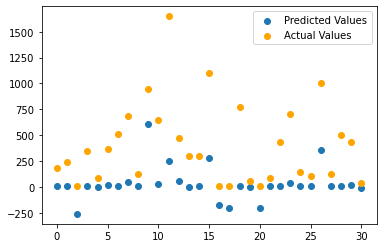

(110668.48662790583,
 109459.23648075336,
 181397.54107567453,
 218707.49648818705)

In [75]:
# constants
degree = 5
Lambda = 0.000000001
q = 4

print_result(learning_rate,degree,Lambda,q,mse_degree_5_batch,mse_degree_5_stochastic)

## ```Plot comparing MSE values with different q for degree 5 polynomial```

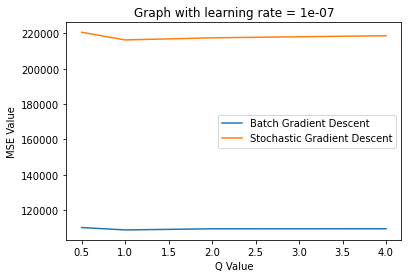

In [76]:
plt.title(f"Graph with learning rate = {learning_rate}")
plt.plot(q_array,mse_degree_5_batch,label='Batch Gradient Descent')
plt.plot(q_array,mse_degree_5_stochastic,label='Stochastic Gradient Descent')
plt.xlabel("Q Value")
plt.ylabel("MSE Value")
plt.legend()
plt.show()

### ```we see that for batch gradient descent best model here is one with least MSE, which is with q as 1 and for stochastic gradient descent best model here is one with q as 1```

# ```Test run for polynomial with degree 6```

In [77]:
mse_degree_6_batch = []
mse_degree_6_stochastic = []

### ```taking q as 0.5```

Batch Gradient Descent:

Cost Function:



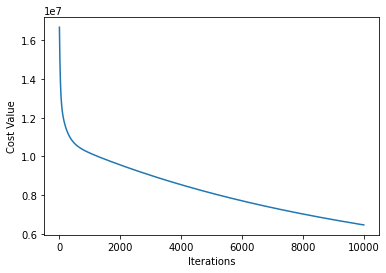

Train Result:

SSE for this regression model is:  12908749.06868026
MSE for this regression model is:  100849.60209906453


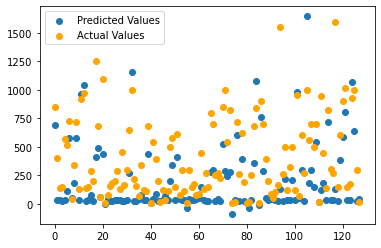

Test Result:

SSE for this regression model is:  3505729.4023246616
MSE for this regression model is:  113088.0452362794


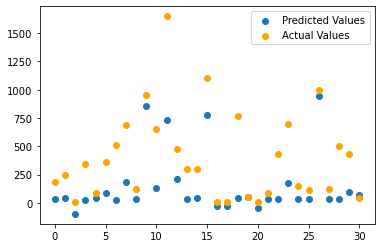

Stochastic Gradient Descent:

Cost Function:



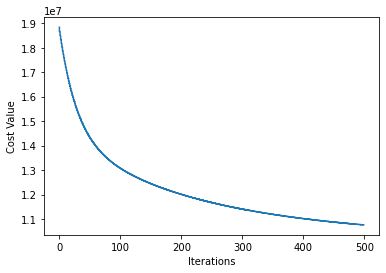

Train Result:

SSE for this regression model is:  21515825.980339553
MSE for this regression model is:  168092.39047140276


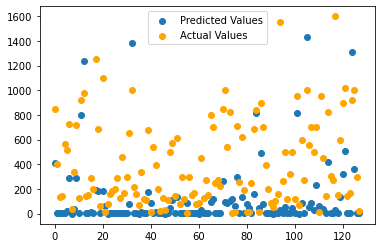

Test Result:

SSE for this regression model is:  5444848.936698631
MSE for this regression model is:  175640.288280601


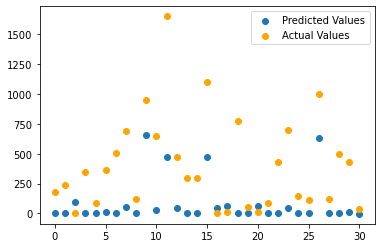

In [78]:
# constants
degree = 6
Lambda = 0.000000001
q = 0.5

mse_train_batch, mse_test_batch, mse_train_stochastic, mse_test_stochastic = print_result(learning_rate,degree,Lambda,q,mse_degree_6_batch,mse_degree_6_stochastic)
mse_train_degree_batch.append(mse_train_batch)
mse_train_degree_stochastic.append(mse_train_stochastic)
mse_test_degree_batch.append(mse_test_batch)
mse_test_degree_stochastic.append(mse_test_stochastic)

### ```taking q as 1```

Batch Gradient Descent:

Cost Function:



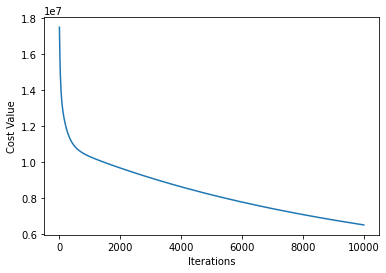

Train Result:

SSE for this regression model is:  13024175.912782365
MSE for this regression model is:  101751.37431861223


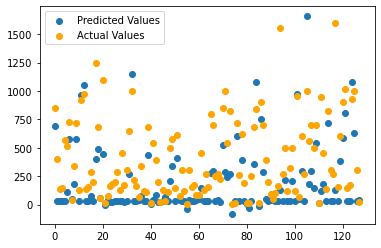

Test Result:

SSE for this regression model is:  3537355.204429774
MSE for this regression model is:  114108.23240096045


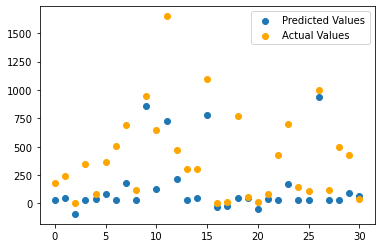

Stochastic Gradient Descent:

Cost Function:



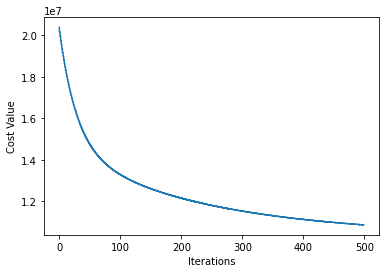

Train Result:

SSE for this regression model is:  21705731.893530615
MSE for this regression model is:  169576.03041820793


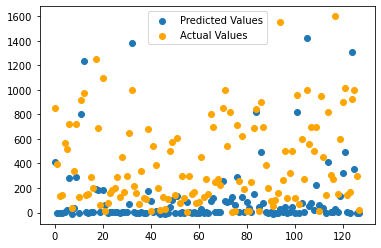

Test Result:

SSE for this regression model is:  5482267.953731197
MSE for this regression model is:  176847.35334616766


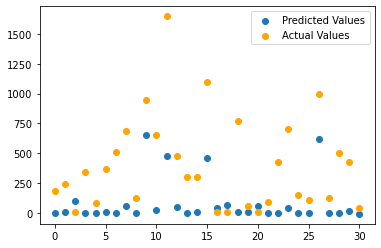

(101751.37431861223,
 114108.23240096045,
 169576.03041820793,
 176847.35334616766)

In [79]:
# constants
degree = 6
Lambda = 0.000000001
q = 1

print_result(learning_rate,degree,Lambda,q,mse_degree_6_batch,mse_degree_6_stochastic)

### ```taking q as 2```

Batch Gradient Descent:

Cost Function:



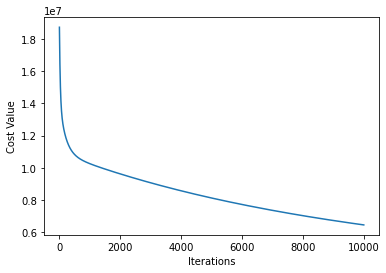

Train Result:

SSE for this regression model is:  12915252.733151188
MSE for this regression model is:  100900.41197774366


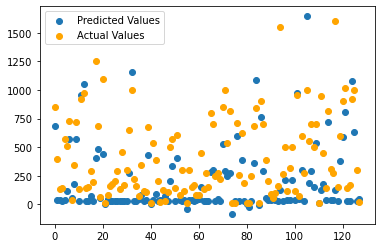

Test Result:

SSE for this regression model is:  3481835.108938962
MSE for this regression model is:  112317.2615786762


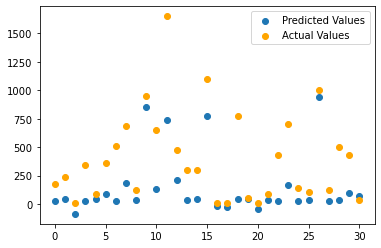

Stochastic Gradient Descent:

Cost Function:



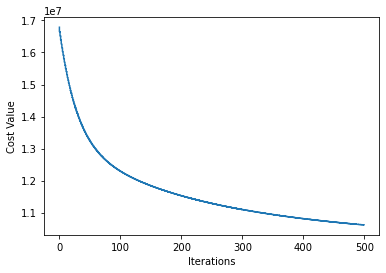

Train Result:

SSE for this regression model is:  21230904.482647847
MSE for this regression model is:  165866.4412706863


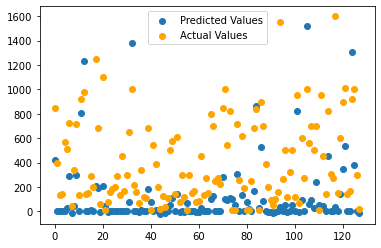

Test Result:

SSE for this regression model is:  5294358.160392094
MSE for this regression model is:  170785.7471094224


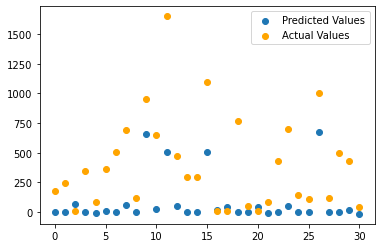

(100900.41197774366, 112317.2615786762, 165866.4412706863, 170785.7471094224)

In [80]:
# constants
degree = 6
Lambda = 0.000000001
q = 2

print_result(learning_rate,degree,Lambda,q,mse_degree_6_batch,mse_degree_6_stochastic)

### ```taking q as 4```

Batch Gradient Descent:

Cost Function:



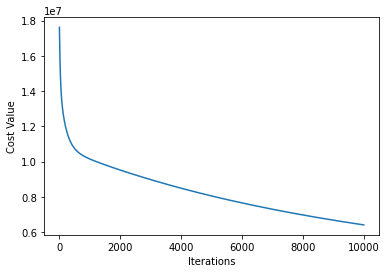

Train Result:

SSE for this regression model is:  12808115.702812597
MSE for this regression model is:  100063.40392822342


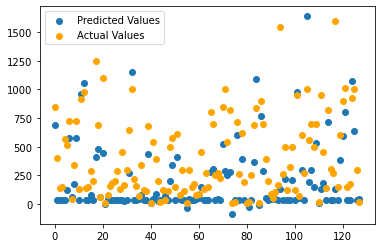

Test Result:

SSE for this regression model is:  3462087.3762138444
MSE for this regression model is:  111680.23794238208


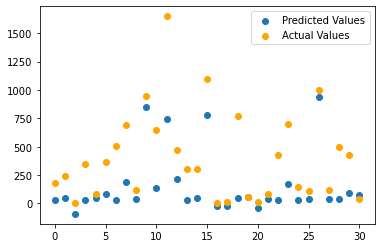

Stochastic Gradient Descent:

Cost Function:



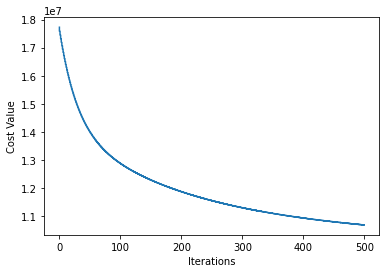

Train Result:

SSE for this regression model is:  21370438.955193132
MSE for this regression model is:  166956.55433744635


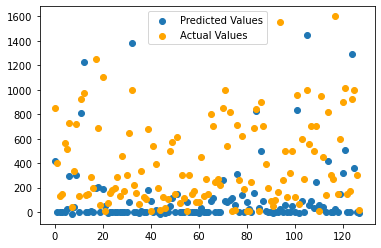

Test Result:

SSE for this regression model is:  5426485.585555256
MSE for this regression model is:  175047.9221146857


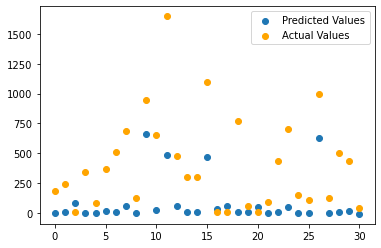

(100063.40392822342, 111680.23794238208, 166956.55433744635, 175047.9221146857)

In [81]:
# constants
degree = 6
Lambda = 0.000000001
q = 4

print_result(learning_rate,degree,Lambda,q,mse_degree_6_batch,mse_degree_6_stochastic)

## ```Plot comparing MSE values with different q for degree 6 polynomial```

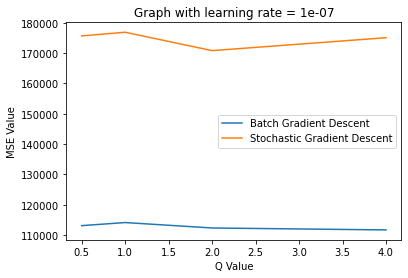

In [82]:
plt.title(f"Graph with learning rate = {learning_rate}")
plt.plot(q_array,mse_degree_6_batch,label='Batch Gradient Descent')
plt.plot(q_array,mse_degree_6_stochastic,label='Stochastic Gradient Descent')
plt.xlabel("Q Value")
plt.ylabel("MSE Value")
plt.legend()
plt.show()

### ```we see that for batch gradient descent best model here is one with least MSE, which is with q as 2 and for stochastic gradient descent best model here is one with q as 2```

# ```Test run for polynomial with degree 7```

In [83]:
mse_degree_7_batch = []
mse_degree_7_stochastic = []

### ```taking q as 0.5```

Batch Gradient Descent:

Cost Function:



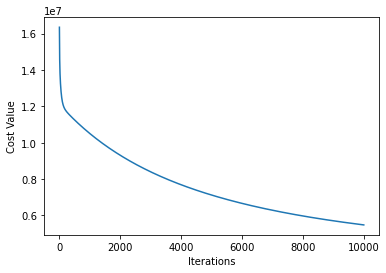

Train Result:

SSE for this regression model is:  10952979.19894211
MSE for this regression model is:  85570.14999173523


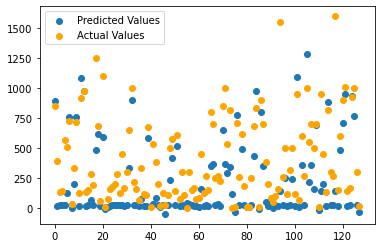

Test Result:

SSE for this regression model is:  3294162.380244969
MSE for this regression model is:  106263.30258854739


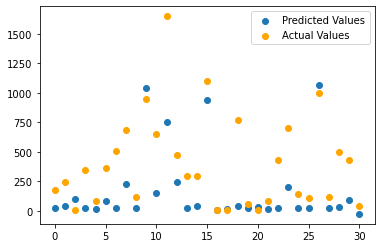

Stochastic Gradient Descent:

Cost Function:



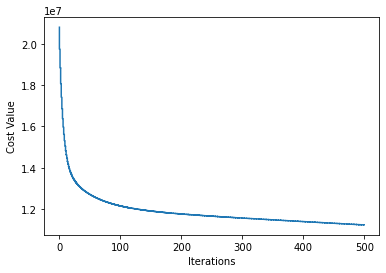

Train Result:

SSE for this regression model is:  22486509.32130601
MSE for this regression model is:  175675.8540727032


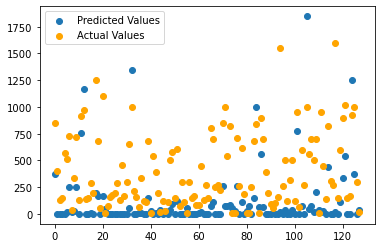

Test Result:

SSE for this regression model is:  5297884.306969762
MSE for this regression model is:  170899.49377321813


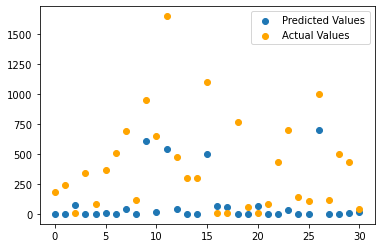

In [84]:
# constants
degree = 7
Lambda = 0.000000001
q = 0.5

mse_train_batch, mse_test_batch, mse_train_stochastic, mse_test_stochastic = print_result(learning_rate,degree,Lambda,q,mse_degree_7_batch,mse_degree_7_stochastic)
mse_train_degree_batch.append(mse_train_batch)
mse_train_degree_stochastic.append(mse_train_stochastic)
mse_test_degree_batch.append(mse_test_batch)
mse_test_degree_stochastic.append(mse_test_stochastic)

### ```taking q as 1```

Batch Gradient Descent:

Cost Function:



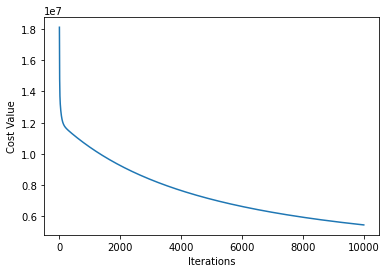

Train Result:

SSE for this regression model is:  10917357.402444834
MSE for this regression model is:  85291.85470660026


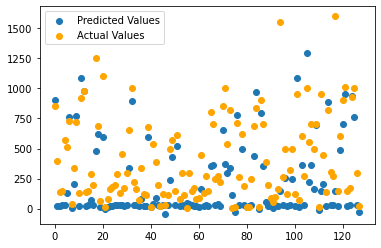

Test Result:

SSE for this regression model is:  3298094.05947285
MSE for this regression model is:  106390.1309507371


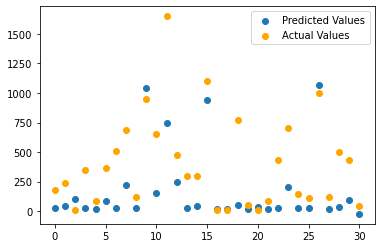

Stochastic Gradient Descent:

Cost Function:



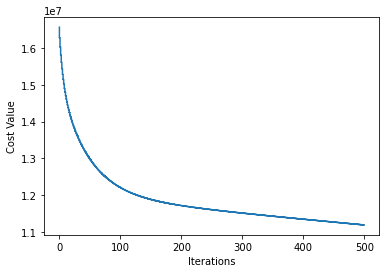

Train Result:

SSE for this regression model is:  22375383.88870078
MSE for this regression model is:  174807.68663047484


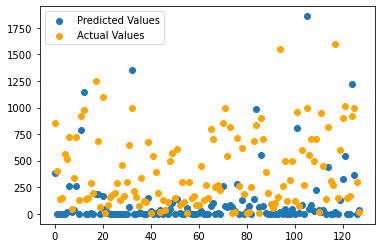

Test Result:

SSE for this regression model is:  5331245.516427813
MSE for this regression model is:  171975.66182025205


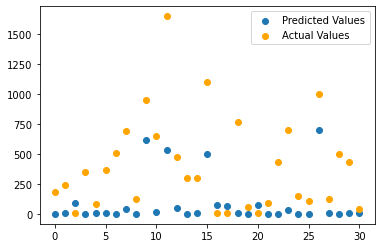

(85291.85470660026, 106390.1309507371, 174807.68663047484, 171975.66182025205)

In [85]:
# constants
degree = 7
Lambda = 0.000000001
q = 1

print_result(learning_rate,degree,Lambda,q,mse_degree_7_batch,mse_degree_7_stochastic)

### ```taking q as 2```

Batch Gradient Descent:

Cost Function:



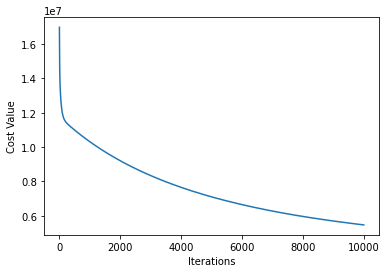

Train Result:

SSE for this regression model is:  10935036.662019905
MSE for this regression model is:  85429.9739220305


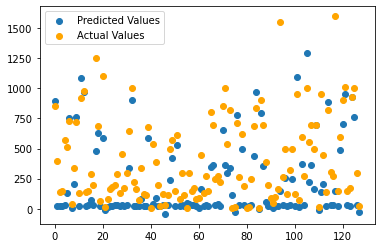

Test Result:

SSE for this regression model is:  3297814.349230869
MSE for this regression model is:  106381.10803970546


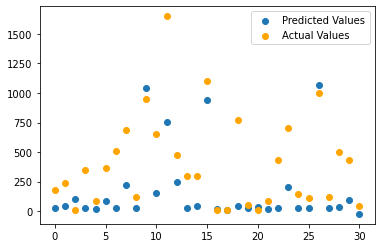

Stochastic Gradient Descent:

Cost Function:



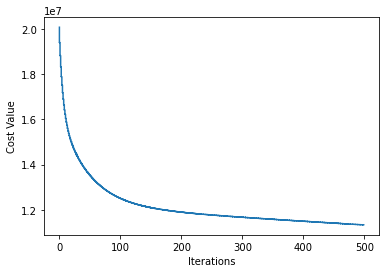

Train Result:

SSE for this regression model is:  22652582.283201575
MSE for this regression model is:  176973.2990875123


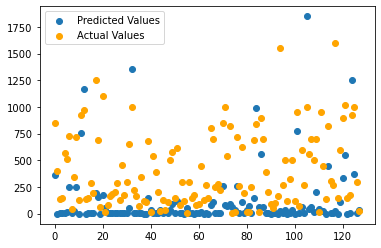

Test Result:

SSE for this regression model is:  5328142.468312076
MSE for this regression model is:  171875.56349393795


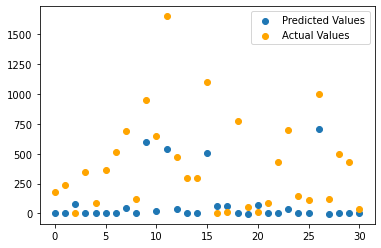

(85429.9739220305, 106381.10803970546, 176973.2990875123, 171875.56349393795)

In [86]:
# constants
degree = 7
Lambda = 0.000000001
q = 2

print_result(learning_rate,degree,Lambda,q,mse_degree_7_batch,mse_degree_7_stochastic)

### ```taking q as 4```

Batch Gradient Descent:

Cost Function:



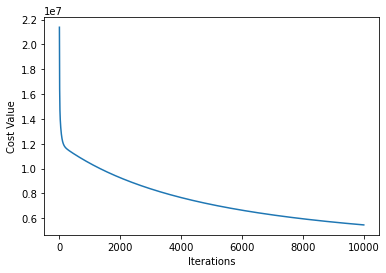

Train Result:

SSE for this regression model is:  10918439.971865904
MSE for this regression model is:  85300.31228020237


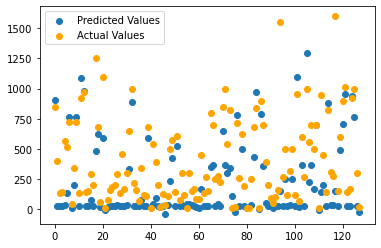

Test Result:

SSE for this regression model is:  3297409.97613636
MSE for this regression model is:  106368.06374633418


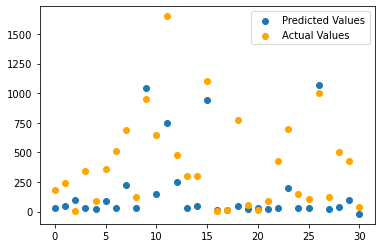

Stochastic Gradient Descent:

Cost Function:



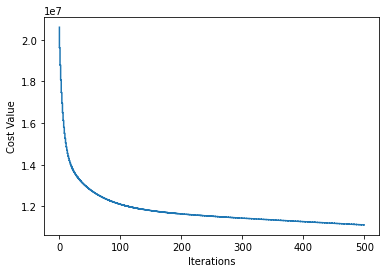

Train Result:

SSE for this regression model is:  22207493.20570229
MSE for this regression model is:  173496.04066954914


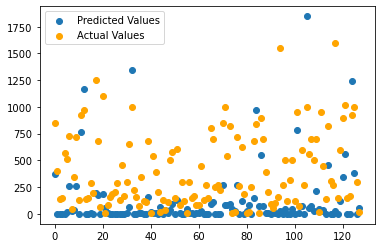

Test Result:

SSE for this regression model is:  5286642.483635218
MSE for this regression model is:  170536.85431081348


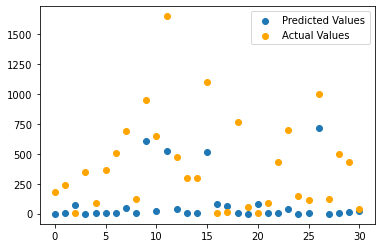

(85300.31228020237, 106368.06374633418, 173496.04066954914, 170536.85431081348)

In [87]:
# constants
degree = 7
Lambda = 0.000000001
q = 4

print_result(learning_rate,degree,Lambda,q,mse_degree_7_batch,mse_degree_7_stochastic)

## ```Plot comparing MSE values with different q for degree 7 polynomial```

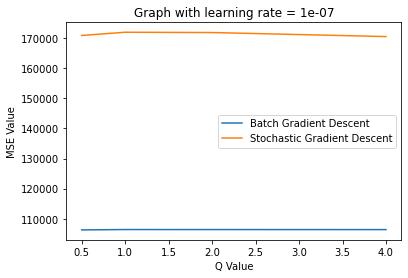

In [88]:
plt.title(f"Graph with learning rate = {learning_rate}")
plt.plot(q_array,mse_degree_7_batch,label='Batch Gradient Descent')
plt.plot(q_array,mse_degree_7_stochastic,label='Stochastic Gradient Descent')
plt.xlabel("Q Value")
plt.ylabel("MSE Value")
plt.legend()
plt.show()

### ```we see that for batch gradient descent best model here is one with least MSE, which is with q as 1 and for stochastic gradient descent best model here is one with q as 1```

# ```Test run for polynomial with degree 8```

In [89]:
mse_degree_8_batch = []
mse_degree_8_stochastic = []

### ```taking q as 0.5```

Batch Gradient Descent:

Cost Function:



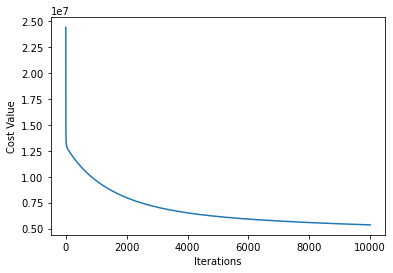

Train Result:

SSE for this regression model is:  10705388.645072956
MSE for this regression model is:  83635.84878963247


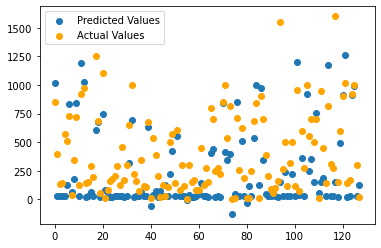

Test Result:

SSE for this regression model is:  3275850.448941595
MSE for this regression model is:  105672.59512714822


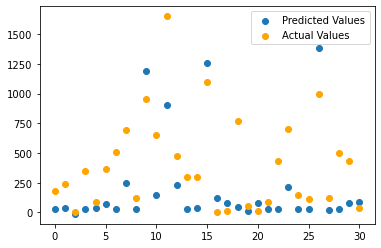

Stochastic Gradient Descent:

Cost Function:



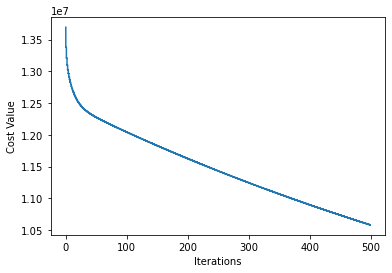

Train Result:

SSE for this regression model is:  21159029.94467719
MSE for this regression model is:  165304.92144279054


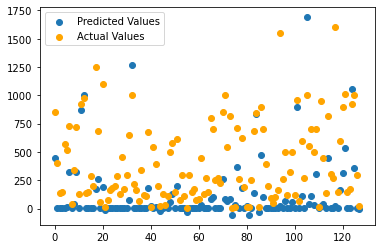

Test Result:

SSE for this regression model is:  5465425.031650476
MSE for this regression model is:  176304.0332790476


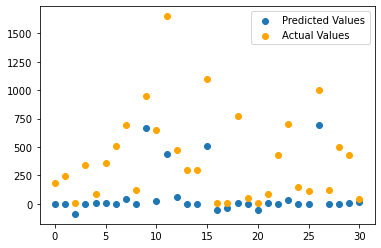

In [90]:
# constants
degree = 8
Lambda = 0.000000001
q = 0.5

mse_train_batch, mse_test_batch, mse_train_stochastic, mse_test_stochastic = print_result(learning_rate,degree,Lambda,q,mse_degree_8_batch,mse_degree_8_stochastic)
mse_train_degree_batch.append(mse_train_batch)
mse_train_degree_stochastic.append(mse_train_stochastic)
mse_test_degree_batch.append(mse_test_batch)
mse_test_degree_stochastic.append(mse_test_stochastic)

### ```taking q as 1```

Batch Gradient Descent:

Cost Function:



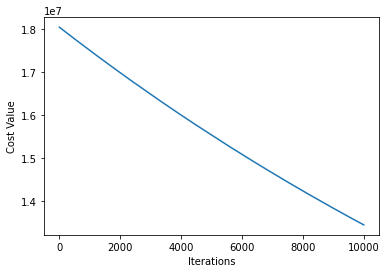

Train Result:

SSE for this regression model is:  26884857.048634253
MSE for this regression model is:  210037.9456924551


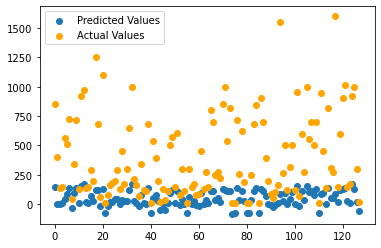

Test Result:

SSE for this regression model is:  7468415.3105720235
MSE for this regression model is:  240916.62292167818


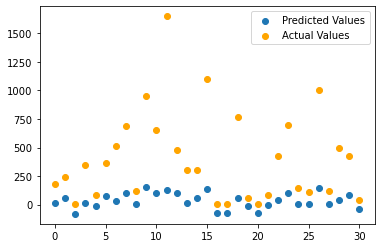

Stochastic Gradient Descent:

Cost Function:



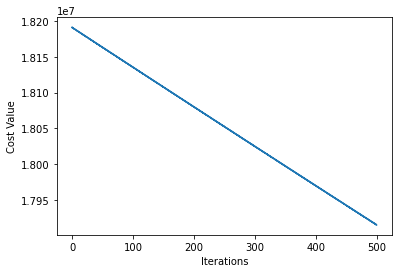

Train Result:

SSE for this regression model is:  35830590.458823636
MSE for this regression model is:  279926.48795955966


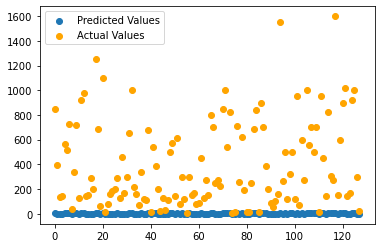

Test Result:

SSE for this regression model is:  9457198.219584359
MSE for this regression model is:  305070.9103091729


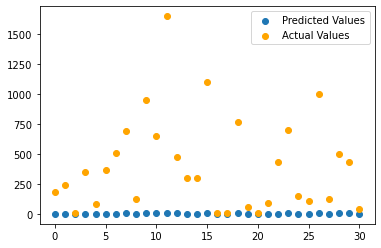

Batch Gradient Descent:

Cost Function:



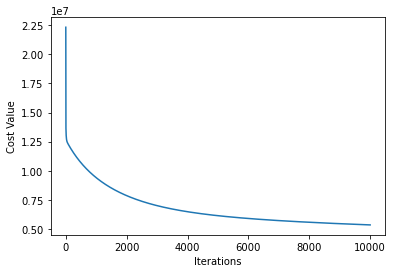

Train Result:

SSE for this regression model is:  10694635.575034242
MSE for this regression model is:  83551.84042995502


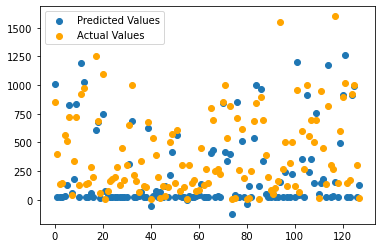

Test Result:

SSE for this regression model is:  3272174.5034274436
MSE for this regression model is:  105554.01623959496


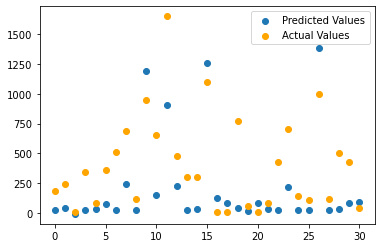

Stochastic Gradient Descent:

Cost Function:



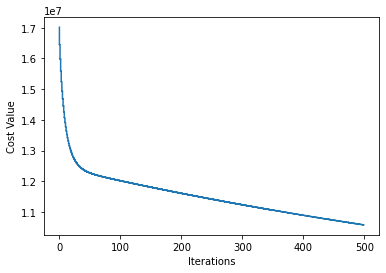

Train Result:

SSE for this regression model is:  21166067.057107504
MSE for this regression model is:  165359.89888365238


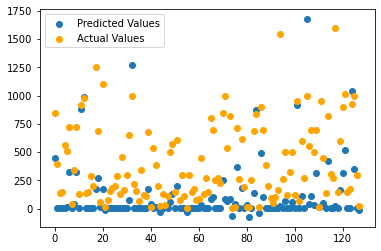

Test Result:

SSE for this regression model is:  5452429.4949261965
MSE for this regression model is:  175884.8224169741


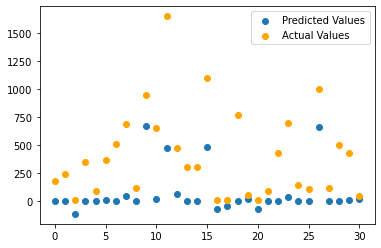

(83551.84042995502, 105554.01623959496, 165359.89888365238, 175884.8224169741)

In [91]:
# constants
degree = 1
Lambda = 0.001
q = 1

print_result(learning_rate,degree,Lambda,q,mse_degree_1_batch,mse_degree_1_stochastic)
degree = 8
Lambda = 0.000000001
q = 1

print_result(learning_rate,degree,Lambda,q,mse_degree_8_batch,mse_degree_8_stochastic)

### ```taking q as 2```

Batch Gradient Descent:

Cost Function:



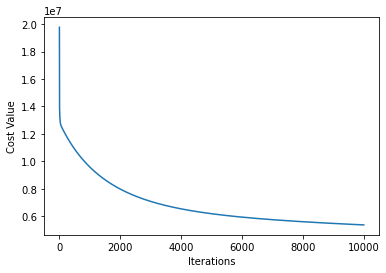

Train Result:

SSE for this regression model is:  10725257.331649778
MSE for this regression model is:  83791.0729035139


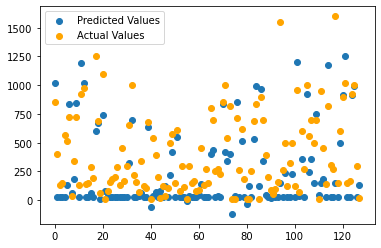

Test Result:

SSE for this regression model is:  3287744.7477751505
MSE for this regression model is:  106056.28218629518


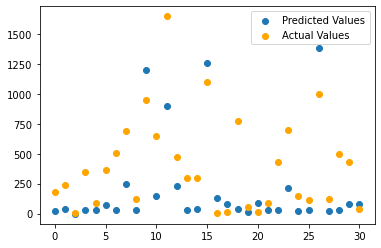

Stochastic Gradient Descent:

Cost Function:



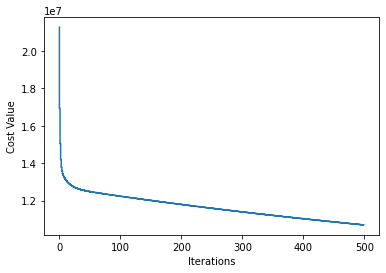

Train Result:

SSE for this regression model is:  21403817.581833355
MSE for this regression model is:  167217.3248580731


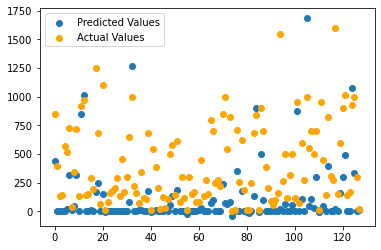

Test Result:

SSE for this regression model is:  5452116.566035953
MSE for this regression model is:  175874.72793664367


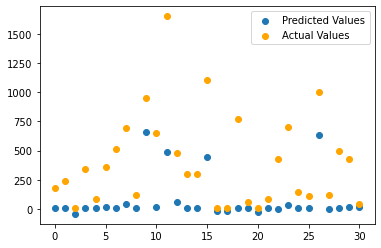

(83791.0729035139, 106056.28218629518, 167217.3248580731, 175874.72793664367)

In [92]:
# constants
degree = 8
Lambda = 0.000000001
q = 2

print_result(learning_rate,degree,Lambda,q,mse_degree_8_batch,mse_degree_8_stochastic)

### ```taking q as 4```

Batch Gradient Descent:

Cost Function:



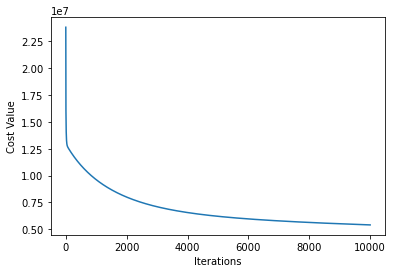

Train Result:

SSE for this regression model is:  10804542.197459426
MSE for this regression model is:  84410.48591765176


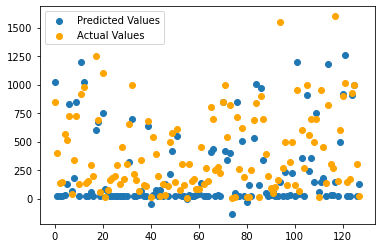

Test Result:

SSE for this regression model is:  3299488.397798341
MSE for this regression model is:  106435.1096063981


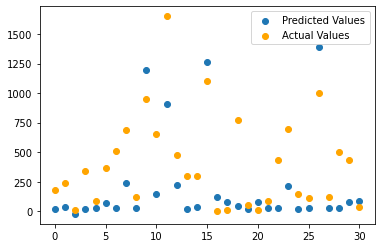

Stochastic Gradient Descent:

Cost Function:



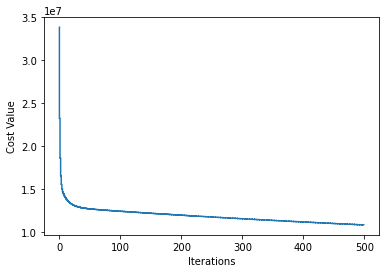

Train Result:

SSE for this regression model is:  21623746.73513354
MSE for this regression model is:  168935.52136823078


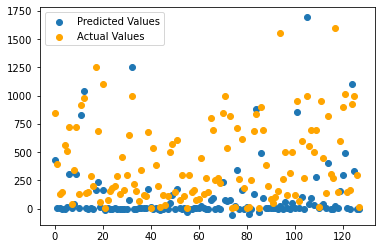

Test Result:

SSE for this regression model is:  5505410.336183498
MSE for this regression model is:  177593.8818123709


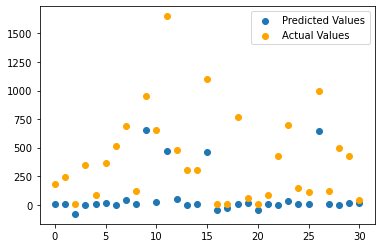

(84410.48591765176, 106435.1096063981, 168935.52136823078, 177593.8818123709)

In [93]:
# constants
degree = 8
Lambda = 0.000000001
q = 4

print_result(learning_rate,degree,Lambda,q,mse_degree_8_batch,mse_degree_8_stochastic)

## ```Plot comparing MSE values with different q for degree 8 polynomial```

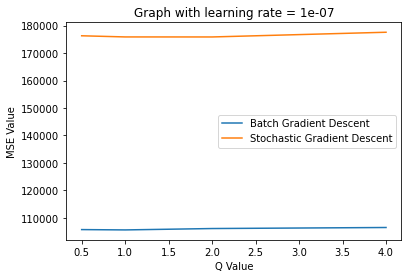

In [94]:
plt.title(f"Graph with learning rate = {learning_rate}")
plt.plot(q_array,mse_degree_8_batch,label='Batch Gradient Descent')
plt.plot(q_array,mse_degree_8_stochastic,label='Stochastic Gradient Descent')
plt.xlabel("Q Value")
plt.ylabel("MSE Value")
plt.legend()
plt.show()

### ```we see that for batch gradient descent best model here is one with least MSE, which is with q as 1 and for stochastic gradient descent best model here is one with q as 1```

# ```Test run for polynomial with degree 9```

In [95]:
mse_degree_9_batch = []
mse_degree_9_stochastic = []

### ```taking q as 0.5```

Batch Gradient Descent:

Cost Function:



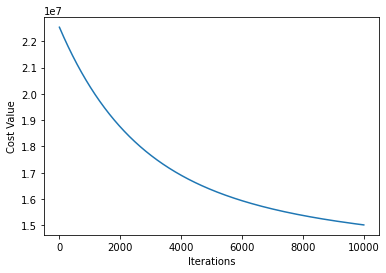

Train Result:

SSE for this regression model is:  30021408.537606224
MSE for this regression model is:  234542.25420004863


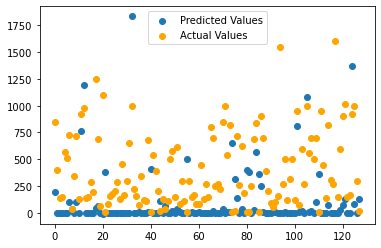

Test Result:

SSE for this regression model is:  8380333.851309307
MSE for this regression model is:  270333.3500422357


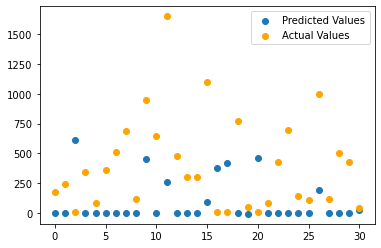

Stochastic Gradient Descent:

Cost Function:



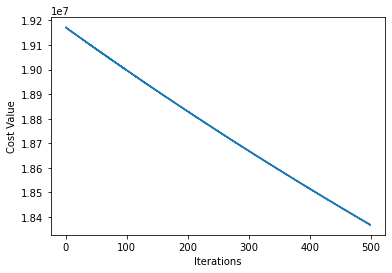

Train Result:

SSE for this regression model is:  36736339.177250154
MSE for this regression model is:  287002.64982226683


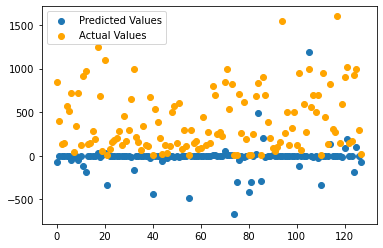

Test Result:

SSE for this regression model is:  9009521.459198583
MSE for this regression model is:  290629.7244902769


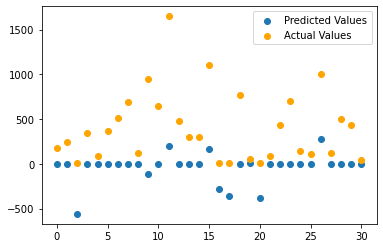

In [97]:
# constants
degree = 9
Lambda = 0.000000001
q = 0.5

mse_train_batch, mse_test_batch, mse_train_stochastic, mse_test_stochastic = print_result(0.00000000001,degree,Lambda,q,mse_degree_9_batch,mse_degree_9_stochastic)
mse_train_degree_batch.append(mse_train_batch)
mse_train_degree_stochastic.append(mse_train_stochastic)
mse_test_degree_batch.append(mse_test_batch)
mse_test_degree_stochastic.append(mse_test_stochastic)

### ```taking q as 1```

Batch Gradient Descent:

Cost Function:



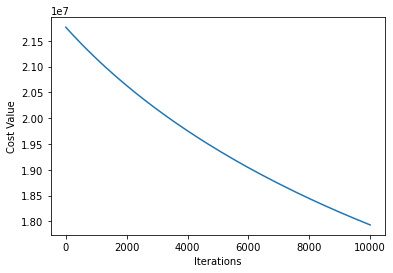

Train Result:

SSE for this regression model is:  35864890.03627818
MSE for this regression model is:  280194.4534084233


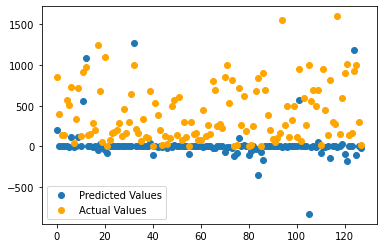

Test Result:

SSE for this regression model is:  10412772.640719006
MSE for this regression model is:  335895.891636097


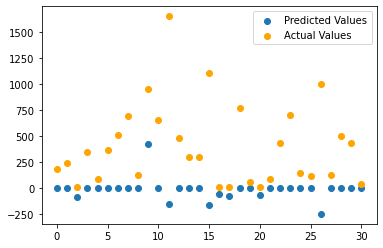

Stochastic Gradient Descent:

Cost Function:



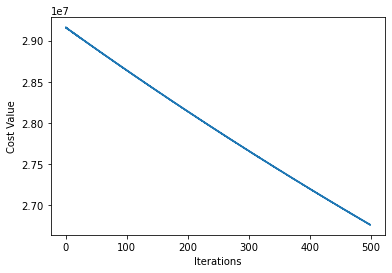

Train Result:

SSE for this regression model is:  53520677.859957084
MSE for this regression model is:  418130.2957809147


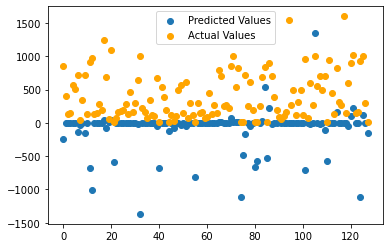

Test Result:

SSE for this regression model is:  11315066.50071373
MSE for this regression model is:  365002.1451843139


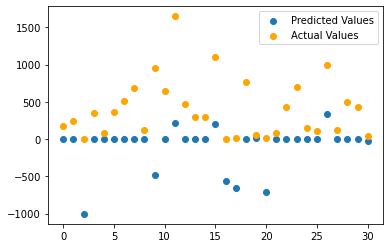

(280194.4534084233, 335895.891636097, 418130.2957809147, 365002.1451843139)

In [98]:
# constants
degree = 9
Lambda = 0.000000001
q = 1

print_result(0.00000000001,degree,Lambda,q,mse_degree_9_batch,mse_degree_9_stochastic)

### ```taking q as 2```

Batch Gradient Descent:

Cost Function:



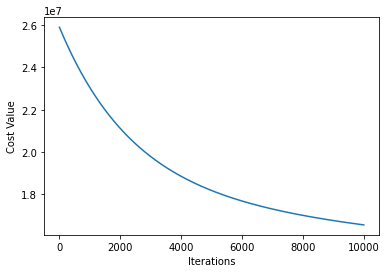

Train Result:

SSE for this regression model is:  33124013.035713002
MSE for this regression model is:  258781.35184150783


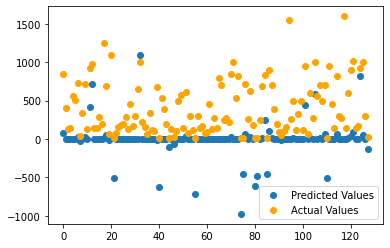

Test Result:

SSE for this regression model is:  10086617.877401708
MSE for this regression model is:  325374.77023876476


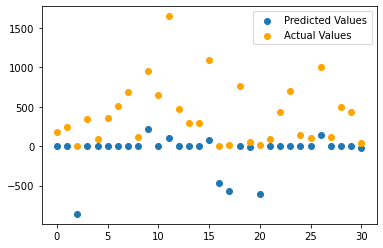

Stochastic Gradient Descent:

Cost Function:



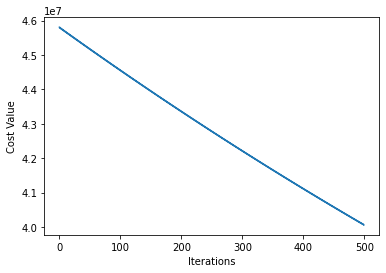

Train Result:

SSE for this regression model is:  80117989.80668724
MSE for this regression model is:  625921.795364744


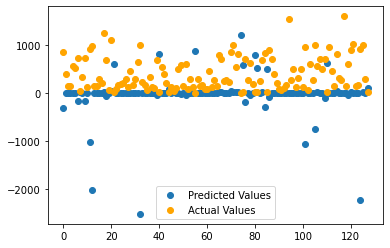

Test Result:

SSE for this regression model is:  13786844.631212492
MSE for this regression model is:  444736.9235874997


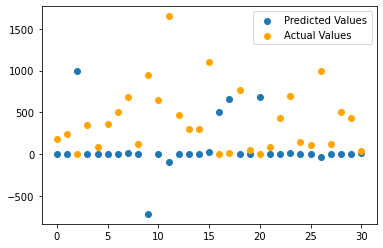

(258781.35184150783, 325374.77023876476, 625921.795364744, 444736.9235874997)

In [99]:
# constants
degree = 9
Lambda = 0.000000001
q = 2

print_result(0.00000000001,degree,Lambda,q,mse_degree_9_batch,mse_degree_9_stochastic)

### ```taking q as 4```

Batch Gradient Descent:

Cost Function:



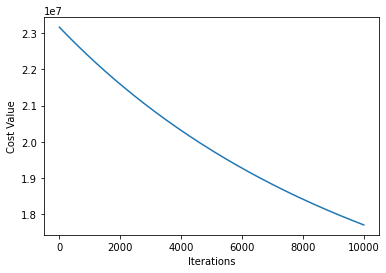

Train Result:

SSE for this regression model is:  35410818.78472412
MSE for this regression model is:  276647.02175565716


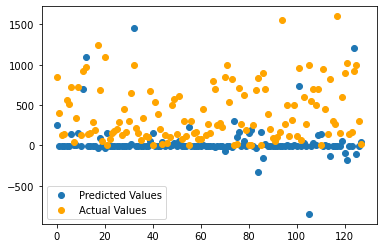

Test Result:

SSE for this regression model is:  10477772.338796075
MSE for this regression model is:  337992.656090196


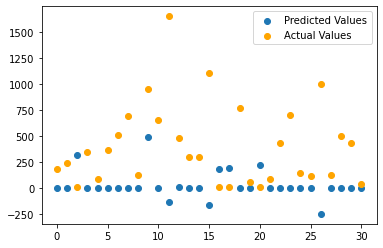

Stochastic Gradient Descent:

Cost Function:



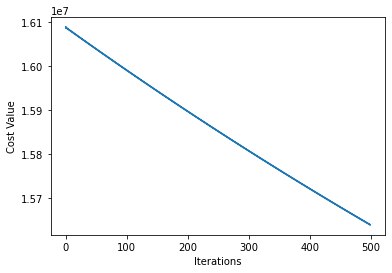

Train Result:

SSE for this regression model is:  31279814.11108905
MSE for this regression model is:  244373.5477428832


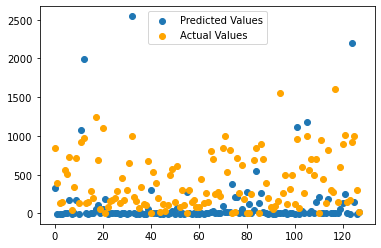

Test Result:

SSE for this regression model is:  6966680.603626122
MSE for this regression model is:  224731.6323750362


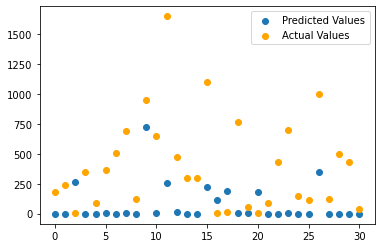

(276647.02175565716, 337992.656090196, 244373.5477428832, 224731.6323750362)

In [100]:
# constants
degree = 9
Lambda = 0.000000001
q = 4

print_result(0.00000000001,degree,Lambda,q,mse_degree_9_batch,mse_degree_9_stochastic)

## ```Plot comparing MSE values with different q for degree 9 polynomial```

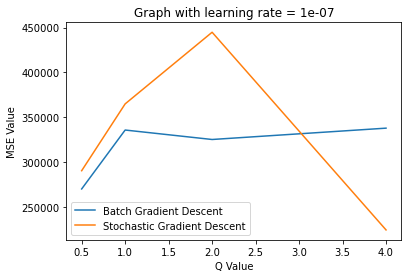

In [101]:
plt.title(f"Graph with learning rate = {learning_rate}")
plt.plot(q_array,mse_degree_9_batch,label='Batch Gradient Descent')
plt.plot(q_array,mse_degree_9_stochastic,label='Stochastic Gradient Descent')
plt.xlabel("Q Value")
plt.ylabel("MSE Value")
plt.legend()
plt.show()

### ```we see that for batch gradient descent best model here is one with least MSE, which is with q as 0.5 and for stochastic gradient descent best model here is one with q as 4```

## ```Train-Test MSE vs Degree of Polynomial Plot```

## ```Batch Gradient Descent Plot```

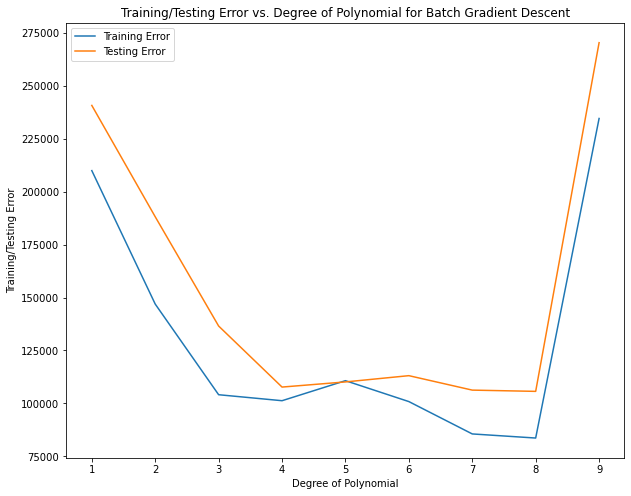

In [104]:
# Plot the training and testing error vs degree of polynomial
degrees = [i for i in range(1,10)]

# for batch gradient descent
plt.figure(figsize=(10, 8))
plt.title('Training/Testing Error vs. Degree of Polynomial for Batch Gradient Descent')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Training/Testing Error')
plt.plot(degrees,mse_train_degree_batch,label='Training Error')
plt.plot(degrees,mse_test_degree_batch,label='Testing Error')
plt.legend()
plt.show()

### ``` Best Model for Batch Gradient Descent is one with degree 7, as test error is minimum```

## ```Stochastic Gradient Descent Plot```

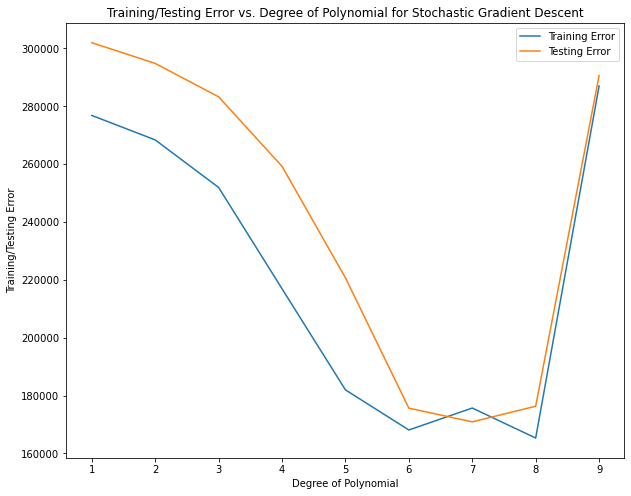

In [137]:
# for stochastic gradient descent
plt.figure(figsize=(10, 8))
plt.title('Training/Testing Error vs. Degree of Polynomial for Stochastic Gradient Descent')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Training/Testing Error')
plt.plot(degrees,mse_train_degree_stochastic,label='Training Error')
plt.plot(degrees,mse_test_degree_stochastic,label='Testing Error')
plt.legend()
plt.show()

### ```Best Model for Stochastic Gradient Descent is one with degree 7,  as test error is minimum```

## ```Tabulating training and testing errors for polynomials```

In [108]:
# batch gradient descent
df_batch = pd.DataFrame()
df_batch["Degree of Polynomial"] = degrees
df_batch["MSE for Training Data"] = mse_train_degree_batch
df_batch["MSE for Testing Data"] = mse_test_degree_batch
df_batch

Degree of Polynomial  MSE for Training Data  MSE for Testing Data
0                     1          209917.836494         240704.979353
1                     2          146892.952791         188120.937629
2                     3          104088.738218         136527.245068
3                     4          101263.469313         107703.740968
4                     5          110718.508389         110133.503423
5                     6          100849.602099         113088.045236
6                     7           85570.149992         106263.302589
7                     8           83635.848790         105672.595127
8                     9          234542.254200         270333.350042

In [110]:
# stochastic gradient descent
df_stochastic = pd.DataFrame()
df_stochastic["Degree of Polynomial"] = degrees
df_stochastic["MSE for Training Data"] = mse_train_degree_stochastic
df_stochastic["MSE for Testing Data"] = mse_test_degree_stochastic
df_stochastic

Degree of Polynomial  MSE for Training Data  MSE for Testing Data
0                     1          276827.457879         301973.784285
1                     2          268363.989407         294805.722318
2                     3          251923.979300         283255.623225
3                     4          216904.949050         259223.991401
4                     5          181947.344983         220675.800162
5                     6          168092.390471         175640.288281
6                     7          175675.854073         170899.493773
7                     8          165304.921443         176304.033279
8                     9          287002.649822         290629.724490

## ```Observation on overfitting```
- We observe that as we increase the degree of polynomial, the difference between test and train error increases, which shows there is overfitting, and our model fits completely on train data, giving large values of error for testing data

- We also observe that for lower degree polynomials both test and train errors have higer values because of underfitting the data

# ```TASK 3: GRAPH PLOTTING```

In [111]:
from mpl_toolkits.mplot3d import Axes3D

def generate_surface_plot(degree,learning_rate,Lambda,q):

    iteration_x_axis_batch = []
    cost_y_axis_batch = []

    # Assuming you have predictions for a meshgrid
    # Replace these with your actual predictions and meshgrid
    # Example data (replace with actual data):
    min_width = train_set["X1^0_X2^1"].min()
    max_width = train_set["X1^0_X2^1"].max()
    min_height = train_set["X1^1_X2^0"].min()
    max_height = train_set["X1^1_X2^0"].max()	

    # Assuming you have predictions for a meshgrid
    # Replace these with your actual predictions and meshgrid
    # Example data (replace with actual data):
    x1_mesh, x2_mesh = np.meshgrid(np.linspace(min_height, max_height, 250),np.linspace(min_width, max_width, 250))
    # predicted_weights = your_model.predict(np.c_[x1_mesh.ravel(), x2_mesh.ravel()]).reshape(x1_mesh.shape)

    x1_flat = x1_mesh.ravel()
    x2_flat = x2_mesh.ravel()

    # Create an array of pairs of meshgrid points (width, height)
    meshgrid_points = np.c_[x1_flat, x2_flat]
    df = pd.DataFrame(meshgrid_points, columns=['Height', 'Width'])
    df_temp = give_dataset_with_all_features(df)
    # now add a column of ones
    ones = [1 for i in range(len(df))]
    df_new = pd.DataFrame()
    df_new[f"X1^{0}_X2^{0}"] = ones
    for feature in df_temp.columns:
        df_new[feature] = df_temp[feature]
    df = df_new

    num_columns_needed = int((degree+1)*(degree+2)*0.5)
    weight_vector = np.random.randn(num_columns_needed)
    weight_vector = batch_gradient_descent(degree,learning_rate,Lambda,q,iteration_x_axis_batch,cost_y_axis_batch)
    
    df = df.iloc[:,:num_columns_needed].to_numpy()
    y_predicted = find_predicted_value(weight_vector,df)
    y_pred = np.reshape(y_predicted,[250,250])

    # Create the 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    ax.plot_surface(x1_mesh, x2_mesh, y_pred, cmap='viridis')

    #The viridis color map transitions smoothly from a light color (e.g., light yellowish-green) for low values to darker colors (e.g., dark purple) for higher values.

    # Label the axes
    ax.set_xlabel('Width of Fish')
    ax.set_ylabel('Height of Fish')
    ax.set_zlabel('Predicted Weight of Fish')

    # Show the plot
    plt.show()

# ```Plotting Surface Plots for every Polynomial```

## ```Surface Plots for four regularized linear regression models```

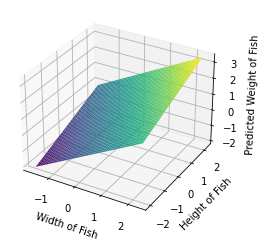

In [112]:
generate_surface_plot(1,0.00000000001,0.000000001,0.5)

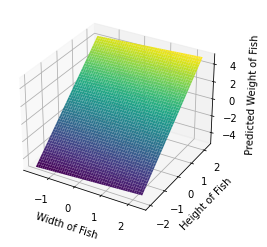

In [113]:
generate_surface_plot(1,0.00000000001,0.000000001,1)

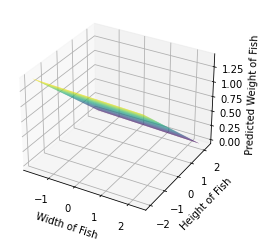

In [114]:
generate_surface_plot(1,0.00000000001,0.000000001,2)

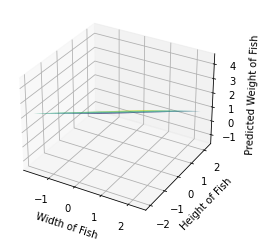

In [115]:
generate_surface_plot(1,0.00000000001,0.000000001,4)

## ```Surface Plot for Degree 2 Polynomial```

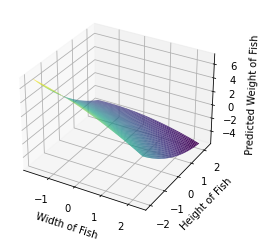

In [116]:
generate_surface_plot(2,0.00000000001,0.000000001,0.5)

## ```Surface Plot for Degree 3 Polynomial```

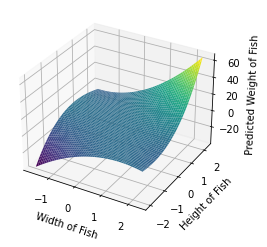

In [117]:
generate_surface_plot(3,0.00000000001,0.000000001,0.5)

## ```Surface Plot for Degree 4 Polynomial```

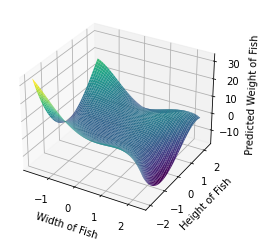

In [118]:
generate_surface_plot(4,0.00000000001,0.000000001,0.5)

## ```Surface Plot for Degree 5 Polynomial```

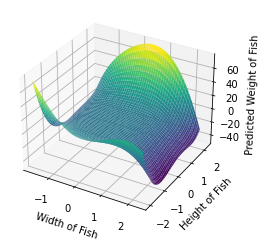

In [119]:
generate_surface_plot(5,0.00000000001,0.000000001,0.5)

## ```Surface Plot for Degree 6 Polynomial```

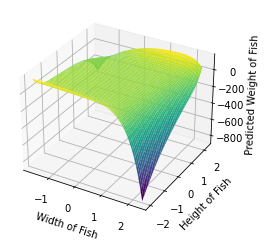

In [120]:
generate_surface_plot(6,0.00000000001,0.000000001,0.5)

## ```Surface Plot for Degree 7 Polynomial```

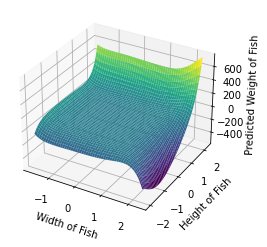

In [121]:
generate_surface_plot(7,0.00000000001,0.000000001,0.5)

## ```Surface Plot for Degree 8 Polynomial```

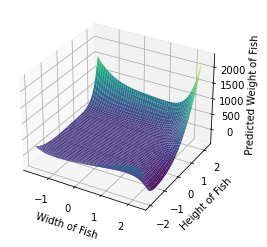

In [122]:
generate_surface_plot(8,0.00000000001,0.000000001,0.5)

## ```Surface Plot for Degree 9 Polynomial```

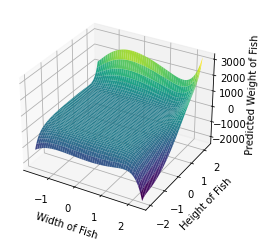

In [123]:
generate_surface_plot(9,0.00000000001,0.000000001,0.5)

## DESCRIPTION OF MODEL USED
1. We first started off generating nine polynomial regression models using Batch and Stochastic Gradient Descent, in which we varied the value of q among 0.5,1,2,4, and for each case, we plotted the graph for cost function v/s epochs (iterations). 
2. We also found SSE and MSE for each case
3. Among these models developed, we found the best model for both Batch and Stochastic Gradient Descent by plotting a graph between training and testing data v/s degree of the polynomial, for both the gradient descent methods.
4. We then plotted surface plots for each of the nine polynomial regression models, and then analyzed the outcome of the same.

## ALGORITHMS USED

1. We used Batch Gradient Descent and Stochastic Gradient Descent algorithms with regularization. 
2. We observe a smoother cost curve in Batch Gradient Descent as compared to that of Stochastic Gradient Descent.

## Implementation of Regularization

1. We used regularization while implementing the Gradient Descent algorithm.
2. Regularization adds a penalty term in the gradient expression, which is used to update our weights.

# ```TASK 4: COMPARATIVE ANALYSIS```

- We observe that polynomial with degree 7 is the best fit polynomial among the nine models developed

In [126]:
mse_for_best_fit_train = mse_train_degree_batch[6]
mse_for_best_fit_test = mse_test_degree_batch[6]
print("MSE for polynomial with degree 7 is (Train): ",mse_for_best_fit_train)
print("MSE for polynomial with degree 7 is (Test): ",mse_for_best_fit_test)

MSE for polynomial with degree 7 is (Train):  85570.14999173523
MSE for polynomial with degree 7 is (Test):  106263.30258854739


In [127]:
# for the four regularized linear regression models, we see that MSE values were much higher than that for best fit polynomial
print("MSE for polynomial with degree 0 is (Train): ",mse_train_degree_batch[0])
print("MSE for polynomial with degree 0 is (Test): ",mse_test_degree_batch[0])

MSE for polynomial with degree 0 is (Train):  209917.83649396067
MSE for polynomial with degree 0 is (Test):  240704.9793531981


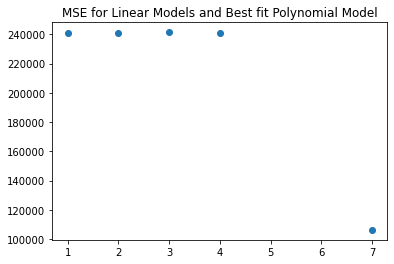

In [135]:
# so for all four regularized linear models with different values of q namely 0.5, 1, 2 and 4 have much higher MSE value
degree = [1,2,3,4,7]
mse_test_val = []
for i in range(len(mse_degree_1_batch)-1):
    mse_test_val.append(mse_degree_1_batch[i])
mse_test_val.append(mse_for_best_fit_test)
plt.title("MSE for Linear Models and Best fit Polynomial Model")
plt.scatter(degree,mse_test_val)
plt.show()

In [136]:
# here 1,2,3,4 represent MSE for linear model with q value as 0.5, 1, 2, 4 which have much higher MSE as compared
# best fit polynomial with degree 7

### ```END OF ASSIGNMENT 1B - REGRESSION WITH REGULARIZATION```